# Desafio A3Data para Cientista de Dados
A empresa de telecomunicações contratou a A3Data para avaliar o cenário de
churn elevado dos seus clientes e, uma vez que estamos falando de um produto
com custo elevado de setup (instalação), a empresa gostaria de uma estratégia
para reduzir esse churn.

## O problema

No contexto da empresa de telecomunicações, o churn se refere à taxa de cancelamento de assinaturas dos seus clientes.

Como o produto possui um alto custo de instalação, a empresa busca reduzir essa taxa para minimizar perdas financeiras e aumentar a lucratividade.

Impacto dos cancelamentos para a empresa de telecomunicações:

Perda de receita: Cada cliente cancelado significa a perda da receita gerada por ele ao longo do tempo.
Aumento de custos: Instalar o serviço em um novo cliente é mais caro do que manter um cliente existente.
Dano à reputação: Uma alta taxa de cancelamentos pode indicar que a empresa tem problemas com seus produtos ou serviços, o que pode prejudicar sua imagem no mercado.



## Conectar ao Drive e Importar as bibliotecas

In [1]:
from google.colab import drive # conectar somrente se estiver no colab, caso contrário apenas passar o caminho local do conjunto de dados quando solicitado
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from textwrap import wrap
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Definindo uma paleta personalizada com as cores fornecidas
custom_palette =  ["#007f7b", "#6ab097", "#f2aa86", "#e7353b", "#ffa26e", "#c11528",
           "#b20323", "#cfcfcf", "#b09e6d", "#ff7000"]

## Carregar o conjunto de cados e criar uma descrição das colunas

In [4]:
dataset = "/content/drive/MyDrive/Customer-Churn - Customer-Churn.csv"
dataset = pd.read_csv(dataset)

In [5]:
# Visualizar algumas amostras do conjunto
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),"118,75","8672,45",No
1,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,"118,65","8477,6",No
2,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,"118,6","7990,05",No
3,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,"118,6","7365,7",No
4,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),"118,35","7804,15",Yes


### Descrição do Conjunto de Dados

- **CustomerID:** Identificação única de cada cliente.
- **Gender:** Gênero do cliente, indicando se é homem ou mulher.
- **SeniorCitizen:** Variável binária indicando se o cliente é idoso (1) ou não (0).
- **Partner:** Indicação se o cliente tem parceiro (Sim) ou não (Não).
- **Dependents:** Indicação se o cliente possui dependentes (Sim) ou não (Não).
- **tenure:** Número de meses que o cliente permaneceu utilizando os serviços da empresa.
- **PhoneServices:** Indicação se o cliente possui serviço telefônico (Sim) ou não (Não).
- **Multipleline:** Indicação se o cliente tem múltiplas linhas telefônicas (Sim), nenhuma linha adicional (Não), ou não possui serviço telefônico (Sem serviço telefônico).
- **InternetService:** Provedor de serviços de Internet utilizado pelo cliente, podendo ser DSL, Fibra óptica, ou nenhum serviço (Não).
- **OnlineSecurity:** Indicação se o cliente possui segurança online (Sim), não possui (Não), ou não tem serviço de internet (Sem serviço de internet).
- **OnlineBackup:** Indicação se o cliente possui backup online (Sim), não possui (Não), ou não tem serviço de internet (Sem serviço de internet).
- **DeviceProtection:** Indicação se o cliente possui proteção de dispositivo (Sim), não possui (Não), ou não tem serviço de internet (Sem serviço de internet).
- **TechSupport:** Indicação se o cliente possui suporte técnico (Sim), não possui (Não), ou não tem serviço de internet (Sem serviço de internet).
- **StreamingTV:** Indicação se o cliente possui serviço de streaming de TV (Sim), não possui (Não), ou não tem serviço de internet (Sem serviço de internet).
- **StreamingMovies:** Indicação se o cliente possui serviço de streaming de filmes (Sim), não possui (Não), ou não tem serviço de internet (Sem serviço de internet).
- **Contract:** Duração do contrato do cliente, podendo ser mensal, anual ou bianual.
- **PaperlessBilling:** Indicação se o cliente recebe cobrança sem papel (Sim) ou não (Não).
- **PaymentMethod:** Método de pagamento utilizado pelo cliente, podendo ser cheque eletrônico, cheque enviado, transferência bancária automática ou cartão de crédito automático.
- **MonthlyCharges:** Valor cobrado do cliente mensalmente pelos serviços.
- **TotalCharges:** Valor total cobrado do cliente ao longo do tempo.
- **Churn:** Indicação se o cliente cancelou os serviços da empresa (Sim) ou não (Não).


## Exploração  inicial dos dados e alguns pré-processamentos


In [6]:
# Podemos visualizar o tipo dos nossos dados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

In [7]:
# Podemos buscar valores faltantes no Dataset
dataset.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
porcentagem_valores_ausentes = (dataset.isnull().sum().sum() / dataset.size) * 100
porcentagem_valores_ausentes

0.00743730688356558

In [9]:
valores_faltantes = dataset.isnull().sum().sum()
total_de_amostras = dataset.shape[0]
total_de_colunas = dataset.shape[1]

print(f'O nosso conjunto de dados é composto por {total_de_amostras} amostras, dispotas em {total_de_colunas} colunas.')
print(f'O nosso conjunto de dados aprensenta {valores_faltantes} amostras faltantes.')

O nosso conjunto de dados é composto por 7043 amostras, dispotas em 21 colunas.
O nosso conjunto de dados aprensenta 11 amostras faltantes.


In [10]:
total_de_amostras

7043

In [11]:
# Algumas estatísticas básicas sobre os nossos dados
dataset.describe()

,SeniorCitizen,tenure
count,7043.000000,7043.000000
mean,0.162147,32.371149
std,0.368612,24.559481
min,0.000000,0.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,55.000000
max,1.000000,72.000000


### Informações extraídas até o momento

- A nossa base de dados possui cerca de 7043 clientes.
- A nossa váriavel alvo é o campo *Churn*
- Dentro da nossa base existem apenas 11 valores ausentes, cerca de 0.007% da nossa base. Como é uma amostra pequena podemos até mesma deletar esses dados, ou substituí-los atráves de alguma técnica.
- Grande parte dos dados estão em formato de *object* ou seja são dados categóricos. Será necessário convertê-los para dados númericos posteriormente.

## Análises descritiva do nosso conjunto de dados

Algumas funções para acelerar alguns processos e uma análise inicial da Taxa de Churn

### Algumas funções para usarmos para plotar as distribuições e comparações
Essas funções servem para plotarmos as distribuiçlões e para realizarmos a comparação com a nossa váriavel alvo.

In [12]:
def plot_distribuicao(nome_coluna, data, palette=None, title='', x_label='', y_label='', figsize=(10, 6), rotation=None, x_tick_labels=None):
    """
    Plota a distribuição de uma coluna usando um gráfico de contagem Seaborn.

    Args:
        nome_coluna (str): Nome da coluna a ser plotada no eixo x.
        data (pd.DataFrame): Conjunto de dados que contém a coluna especificada.
        palette (list, optional): Paleta de cores a ser usada no gráfico.
        title (str, optional): Título do gráfico.
        x_label (str, optional): Rótulo do eixo x.
        y_label (str, optional): Rótulo do eixo y.
        rotation (int, optional): Rotação dos rótulos do eixo x em graus.
        figsize (tuple, optional): Tamanho da figura (largura, altura).
        x_tick_labels (list, optional): Rótulos para os ticks do eixo x.
    """


    if palette is None:
        palette = sns.color_palette()

    # Criando a figura e o gráfico de contagem
    fig, ax = plt.subplots(figsize=figsize)
    sns.countplot(x=nome_coluna, data=data, palette=palette, ax=ax)  # Plotando no eixo especificado

    # Configurando título, rótulos e formatação
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    # Adicionando porcentagens aos eixos
    total = len(data[nome_coluna])
    for rect in ax.patches:
        height = rect.get_height()
        ax.annotate('{:.1f}%'.format(100 * height/total),
                       xy=(rect.get_x() + rect.get_width() / 2, height),
                       xytext=(0, 5),  # 5 pontos de deslocamento vertical
                       textcoords="offset points",
                       ha='center', va='bottom',
                       bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray', lw=1))


    if rotation is not None:
        ax.set_xticklabels(x_tick_labels, rotation=rotation)


    plt.show()



def plot_tx_cancelamento_comparacao(data, x_col, y_col, title, xlabel=None, ylabel=None, ylim=None, xticklabels=None, colors=None):
    """
    Plota um gráfico de barras comparando taxas de cancelamento com base nos dados fornecidos.

    Parâmetros:
    - data (DataFrame): Os dados a serem plotados.
    - x_col (str): O nome da coluna que será usada no eixo x do gráfico.
    - y_col (str): O nome da coluna que será usada no eixo y do gráfico, representando as taxas de cancelamento.
    - title (str): O título do gráfico.
    - xlabel (str, opcional): O rótulo do eixo x. Padrão é None.
    - ylabel (str, opcional): O rótulo do eixo y. Padrão é None.
    - ylim (tuple, opcional): Um par de valores indicando os limites do eixo y. Padrão é None.
    - xticklabels (list, opcional): Uma lista de rótulos para os ticks do eixo x. Padrão é None.
    - colors (list, opcional): Uma lista de cores para as barras do gráfico. Padrão é None.

    Retorna:
    - None: O gráfico é exibido diretamente.

    Exemplo:
    >>> plot_tx_cancelamento_comparacao(dados, 'mês', 'taxa_cancelamento', 'Taxa de Cancelamento por Mês',
    ...                                 xlabel='Mês', ylabel='Taxa de Cancelamento (%)', ylim=(0, 20),
    ...                                 xticklabels=['Jan', 'Fev', 'Mar'], colors=['blue', 'orange', 'green'])
    """
    sns.set(style="whitegrid")
    sns.set_palette("pastel")

    fig, ax = plt.subplots(figsize=(10, 6))

    sns.barplot(x=x_col, y=y_col, data=data, ci=None, ax=ax, palette=colors)

    ax.set_title('\n'.join(wrap(title, 35)))
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
    if ylim:
        ax.set_ylim(ylim)
    if xticklabels:
        ax.set_xticklabels(xticklabels)

    # Adicionando porcentagens sobre as barras
    total = data[y_col].sum()  # Calculando o total de todas as barras
    porcentagens = [(value / total) * 100 for value in data[y_col]]  # Calculando as porcentagens
    ax.set_yticks(range(0, 101, 10))  # Definindo os ticks do eixo y de 0 a 100 com intervalo de 10
    ax.set_yticklabels([f"{i}%" for i in range(0, 101, 10)])  # Definindo os rótulos dos ticks do eixo y como porcentagens

    plt.show()


### Análise da Taxa de Cancelamentos (*Churn*)

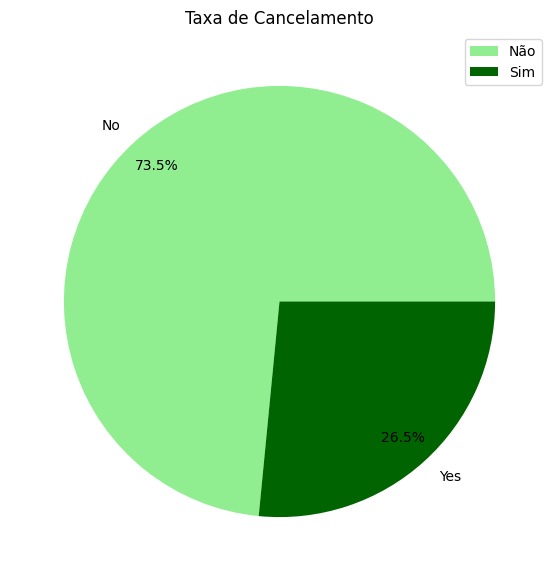

In [13]:
churn_percentage = (dataset['Churn'].value_counts() * 100.0 / len(dataset))

# Criando o gráfico de pizza
plt.figure(figsize=(7, 7))
sns.set_palette(['lightgreen', 'darkgreen'])  #
senior = plt.pie(churn_percentage, labels=['No', 'Yes'], autopct='%1.1f%%', pctdistance=0.85)


plt.title('Taxa de Cancelamento')
plt.legend(labels=['Não', 'Sim'])

plt.show()


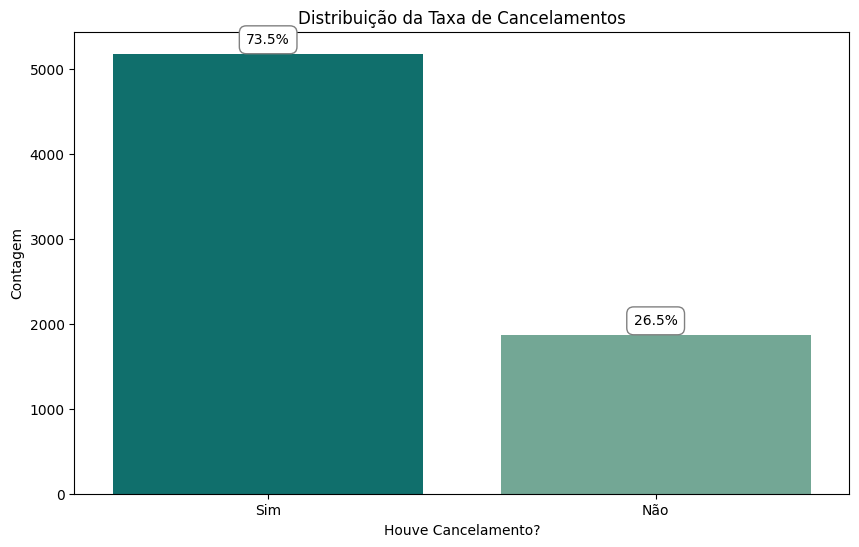

In [14]:
plot_distribuicao(nome_coluna='Churn',
                  data=dataset,
                  palette=custom_palette,
                  title='Distribuição da Taxa de Cancelamentos',
                  x_label='Houve Cancelamento?',
                  y_label='Contagem',
                  rotation=0,
                  x_tick_labels=['Sim', 'Não'])

### **Informações extraídas até o momento**

- A nossa base de dados possui cerca de 7043 clientes.
- A nossa váriavel alvo é o campo *Churn*
- Dentro da nossa base existem apenas 11 valores ausentes, cerca de 0.007% da nossa base. Como é uma amostra pequena podemos até mesma deletar esses dados, ou substituí-los atráves de alguma técnica.
- Grande parte dos dados estão em formato de *object* ou seja são dados categóricos. Será necessário convertê-los para dados númericos posteriormente.
- Mais de 25% dos clientes abandoram o serviço, ou seja para cada 4 clientes 1 abandona a empresa.

## Separação da base de dados

Exploramos melhor ​​​o conjunto de dados para entender quais são os tipos de variáveis. como eles interagem entre si e estudando as relações com a variável alvo.

Dividi as análises nesse formato:

- Análises ​​demográficas dos clientes
- Análises ​​da conta do cliente
- Análises ​​de serviços ao cliente

In [15]:
# Para realizar as análises e comparações com a coluna Churn é necessário que a mesma seja númerica.
# Nesse caso vamos fazer uma criar uma nova coluna com essas propriedades.

map = {"No": 0, "Yes": 1}
dataset['ChurnNum'] = dataset['Churn'].map(map)

In [16]:
# Calculando a porcentagem de cancelamento
dataset['ChurnPercentage'] = dataset['ChurnNum'] * 100

## **Análises ​​demográficas dos clientes**

### Análise individual se o cliente é idoso (*SeniorCitizen*) e a relação dessa informação com a taxa de cancelamento

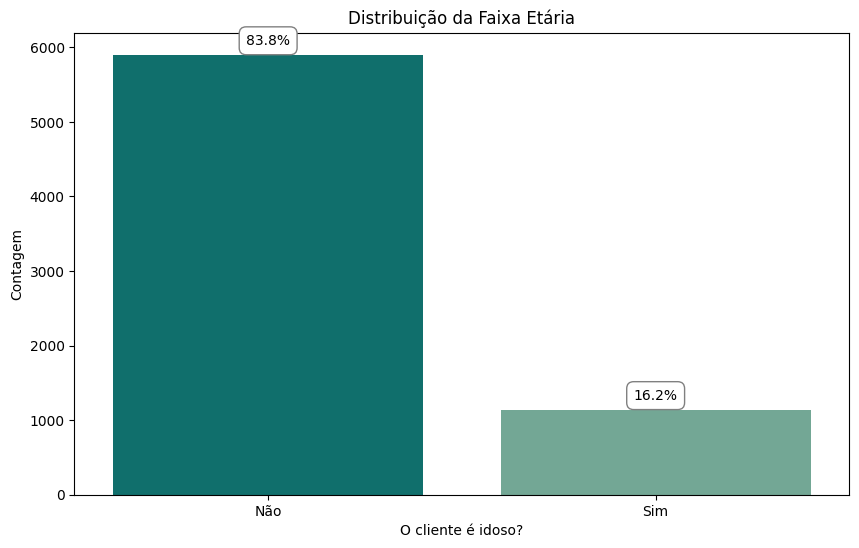

In [17]:
plot_distribuicao(nome_coluna='SeniorCitizen',
                  data=dataset,
                  palette=custom_palette,
                  title='Distribuição da Faixa Etária',
                  x_label='O cliente é idoso?',
                  y_label='Contagem',
                  rotation=0,
                  x_tick_labels=['Não', 'Sim'])

<Figure size 1200x600 with 0 Axes>

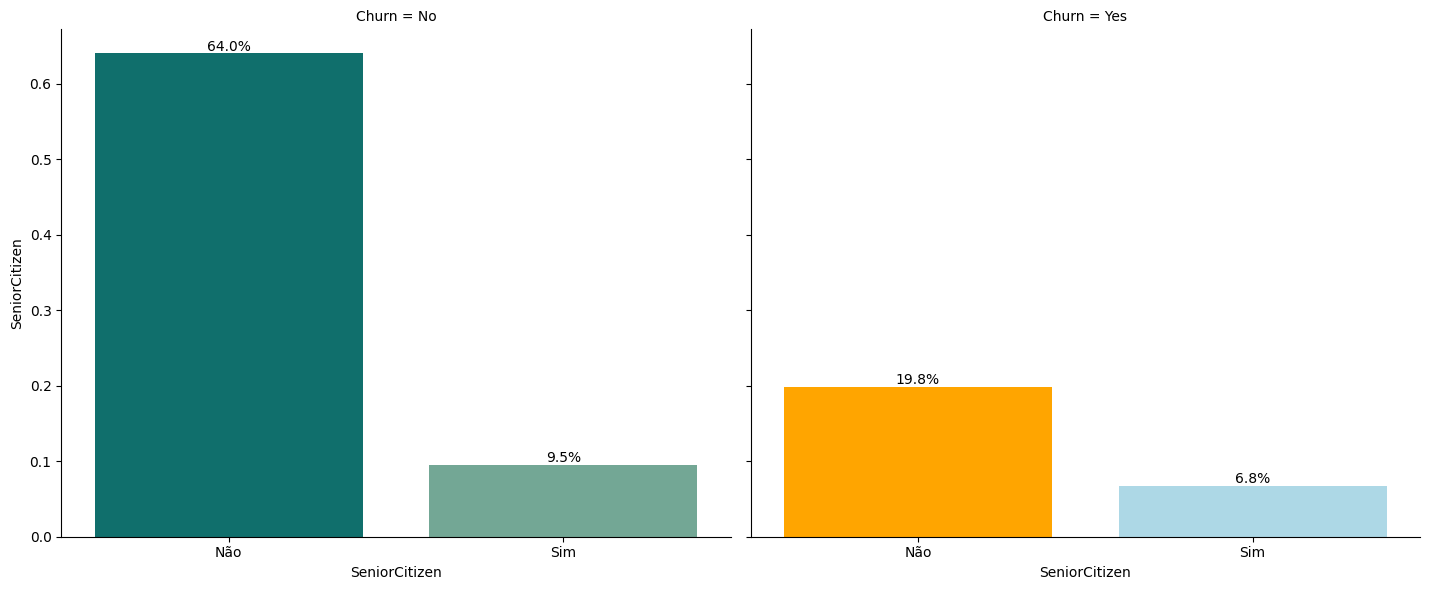

In [18]:

plt.figure(figsize=(12, 6))  # Largura x Altura

# Criando uma grade de facetas com base na variável 'Churn'
grid = sns.FacetGrid(dataset, col='Churn', height=6, aspect=1.2)

# Plotando gráficos de barra em cada faceta para 'SeniorCitizen'
grid.map(sns.barplot, 'SeniorCitizen', 'SeniorCitizen', estimator=lambda x: len(x) / len(dataset), palette=custom_palette)


grid.set_xticklabels(['Não', 'Sim'])
grid.set_titles(col_template='Churn = {col_name}')

for ax in grid.axes.flatten():
    total = len(dataset[dataset['Churn'] == ax.get_title()])
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100 * p.get_height()),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')


second_palette = ['orange', 'lightblue']
grid.axes[0, 1].patches[0].set_facecolor(second_palette[0])
grid.axes[0, 1].patches[1].set_facecolor(second_palette[1])
plt.show()


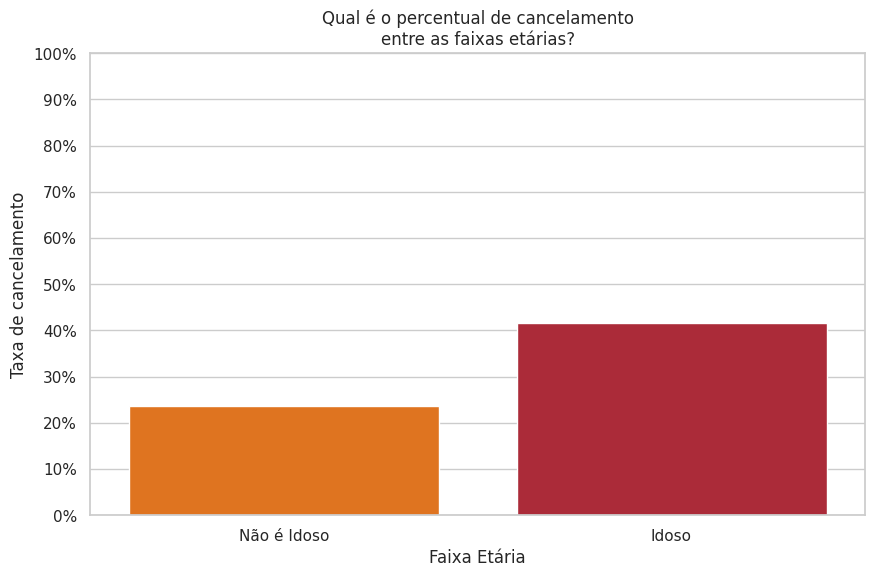

In [19]:

plot_tx_cancelamento_comparacao(data=dataset,
                                 x_col="SeniorCitizen",
                                 y_col="ChurnPercentage",
                                 title="Qual é o percentual de cancelamento entre as faixas etárias?",
                                 xlabel="Faixa Etária",
                                 ylabel="Taxa de cancelamento",
                                 colors=["#ff7000", "#c11528"],
                                 xticklabels=['Não é Idoso', 'Idoso'] )


### **Informações extraídas até o momento**

- A nossa base de dados possui cerca de 7043 clientes.
- A nossa váriavel alvo é o campo *Churn*
- Dentro da nossa base existem apenas 11 valores ausentes, cerca de 0.007% da nossa base. Como é uma amostra pequena podemos até mesma deletar esses dados, ou substituí-los atráves de alguma técnica.
- Grande parte dos dados estão em formato de *object* ou seja são dados categóricos. Será necessário convertê-los para dados númericos posteriormente.
- Mais de 25% dos clientes abandoram o serviço, ou seja para cada 4 clientes 1 abandona a empresa.

- A maioria dos clientes  não são  idosos (> 80%).
- A taxa de desistência de Idosos (> 40%). Os clientes mais jovens é (< 25%)
- Os mais velhos cancelam mais do que os clientes mais jovens.



### Análise individual sobre o gênero (*gender*) e a relação dessa informação com a taxa de cancelamento

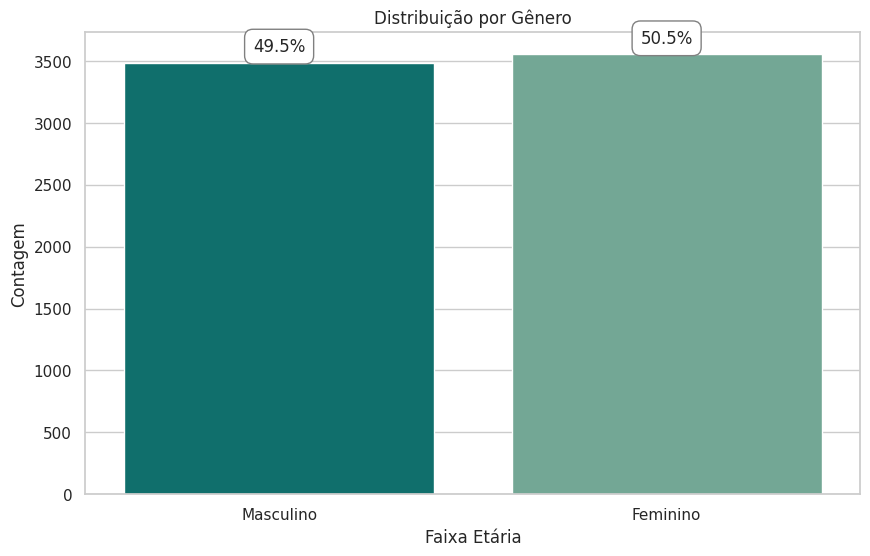

In [20]:
plot_distribuicao(nome_coluna='gender',
                  data=dataset,
                  palette=custom_palette,
                  title='Distribuição por Gênero',
                  x_label='Faixa Etária',
                  y_label='Contagem',
                  rotation=0,
                  x_tick_labels=['Masculino', 'Feminino'])

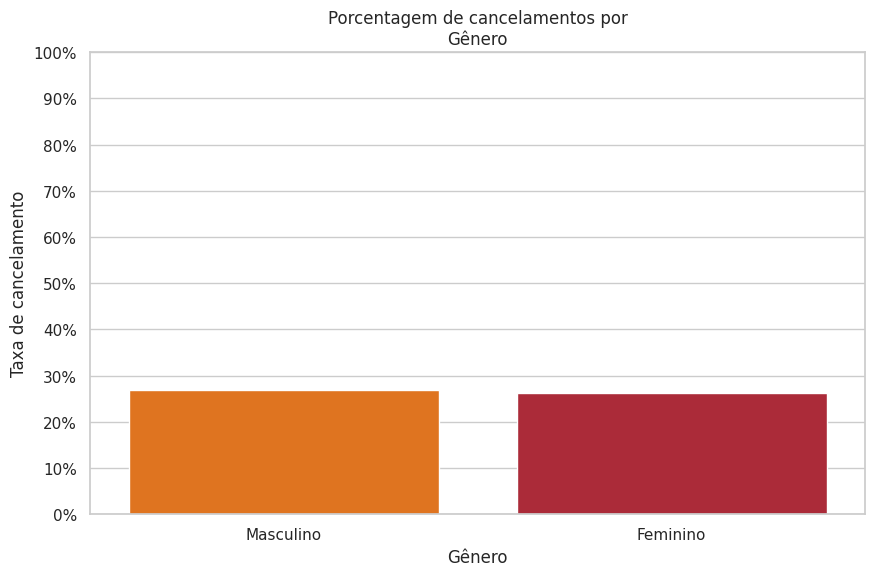

In [21]:
plot_tx_cancelamento_comparacao(data=dataset,
                                 x_col="gender",
                                 y_col="ChurnPercentage",
                                 title="Porcentagem de cancelamentos por Gênero",
                                 xlabel="Gênero",
                                 ylabel="Taxa de cancelamento",
                                 colors=["#ff7000", "#c11528"],
                                 xticklabels=['Masculino', 'Feminino'] )

### **Informações extraídas até o momento**

- A nossa base de dados possui cerca de 7043 clientes.
- A nossa váriavel alvo é o campo *Churn*
- Dentro da nossa base existem apenas 11 valores ausentes, cerca de 0.007% da nossa base. Como é uma amostra pequena podemos até mesma deletar esses dados, ou substituí-los atráves de alguma técnica.
- Grande parte dos dados estão em formato de *object* ou seja são dados categóricos. Será necessário convertê-los para dados númericos posteriormente.
- Mais de 25% dos clientes abandoram o serviço, ou seja para cada 4 clientes 1 abandona a empresa.

- A maioria dos clientes  não são  idosos (> 80%).
- A taxa de desistência de Idosos (> 40%). Os clientes mais jovens é (< 25%)
- Os mais velhos cancelam mais do que os clientes mais jovens.

- A distribuição entre os genêros é quase igual.
- A taxa de desistência  entre os genêros é quase a mesma também.
- Isso indica que taxa de desistência não tem relação com o gênero.



### Análise individual se o cliente possui dependentes  (*Dependents*) e a relação dessa informação com a taxa de cancelamento

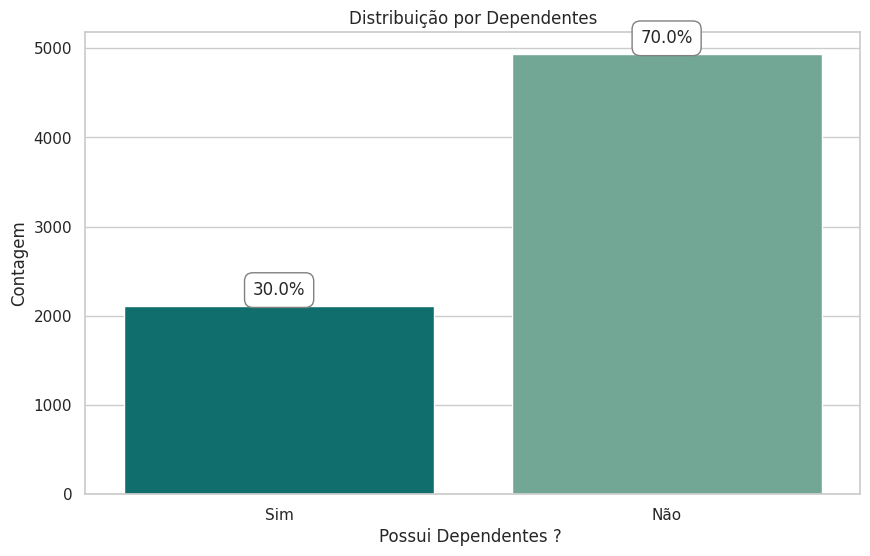

In [22]:
# Análise Individual
plot_distribuicao(nome_coluna='Dependents',
                  data=dataset,
                  palette=custom_palette,
                  title='Distribuição por Dependentes',
                  x_label='Possui Dependentes ? ',
                  y_label='Contagem',
                  rotation=0,
                  x_tick_labels=['Sim', 'Não'])

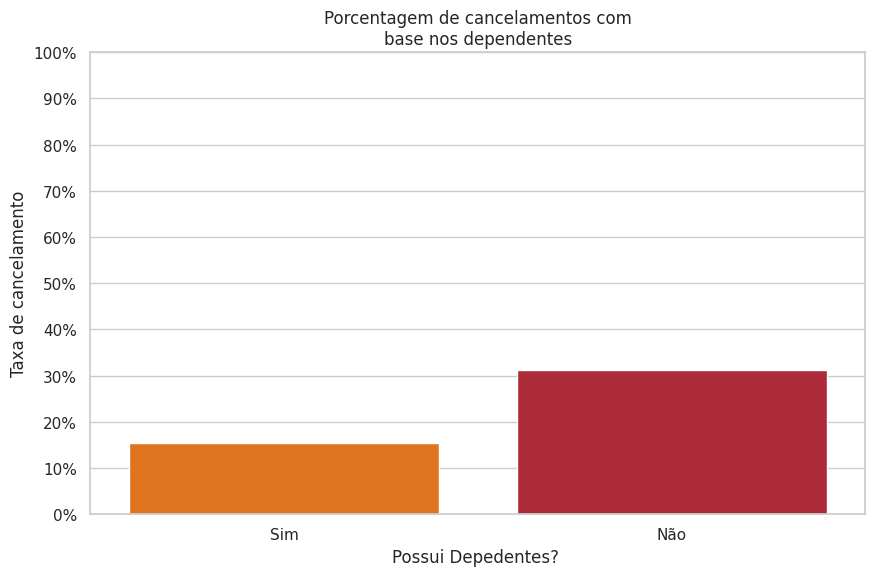

In [23]:
# Análise em relação a taxa de cancelamento
plot_tx_cancelamento_comparacao(data=dataset,
                                 x_col="Dependents",
                                 y_col="ChurnPercentage",
                                 title="Porcentagem de cancelamentos com base nos dependentes",
                                 xlabel="Possui Depedentes? ",
                                 ylabel="Taxa de cancelamento",
                                 colors=["#ff7000", "#c11528"],
                                 xticklabels=['Sim', 'Não'] )

### **Informações extraídas até o momento**

- A nossa base de dados possui cerca de 7043 clientes.
- A nossa váriavel alvo é o campo *Churn*
- Dentro da nossa base existem apenas 11 valores ausentes, cerca de 0.007% da nossa base. Como é uma amostra pequena podemos até mesma deletar esses dados, ou substituí-los atráves de alguma técnica.
- Grande parte dos dados estão em formato de *object* ou seja são dados categóricos. Será necessário convertê-los para dados númericos posteriormente.
- Mais de 25% dos clientes abandoram o serviço, ou seja para cada 4 clientes 1 abandona a empresa.

- A maioria dos clientes  não são  idosos (> 80%).
- A taxa de desistência de Idosos (> 40%). Os clientes mais jovens é (< 25%)
- Os mais velhos cancelam mais do que os clientes mais jovens.

- A distribuição entre os genêros é quase igual.
- A taxa de desistência  entre os genêros é quase a mesma também.
- Isso indica que taxa de desistência não tem relação com o gênero.

- Cerca de 70% dos clientes não possuem dependentes.
- Observa-se que clientes que não possuem dependentes possuem taxa de cancelamento (>30%).
- Podemos dizer que clientes que possuem dependentes costumam permanecer por mais tempo em relação aos demais.



### Análise individual se o cliente possui um parceiro  (*Partner*) e a relação dessa informação com a taxa de cancelamento

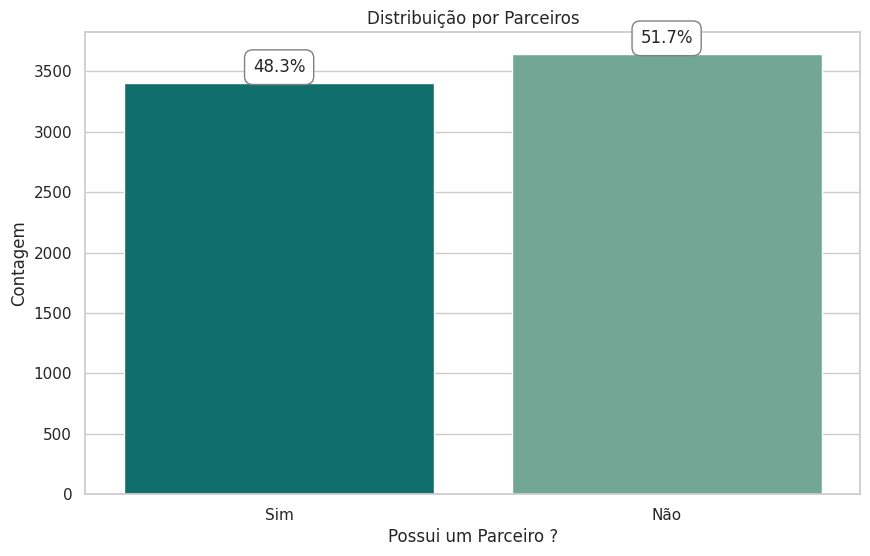

In [24]:
# Análise Individual
plot_distribuicao(nome_coluna='Partner',
                  data=dataset,
                  palette=custom_palette,
                  title='Distribuição por Parceiros',
                  x_label='Possui um Parceiro ?',
                  y_label='Contagem',
                  rotation=0,
                  x_tick_labels=['Sim', 'Não'])

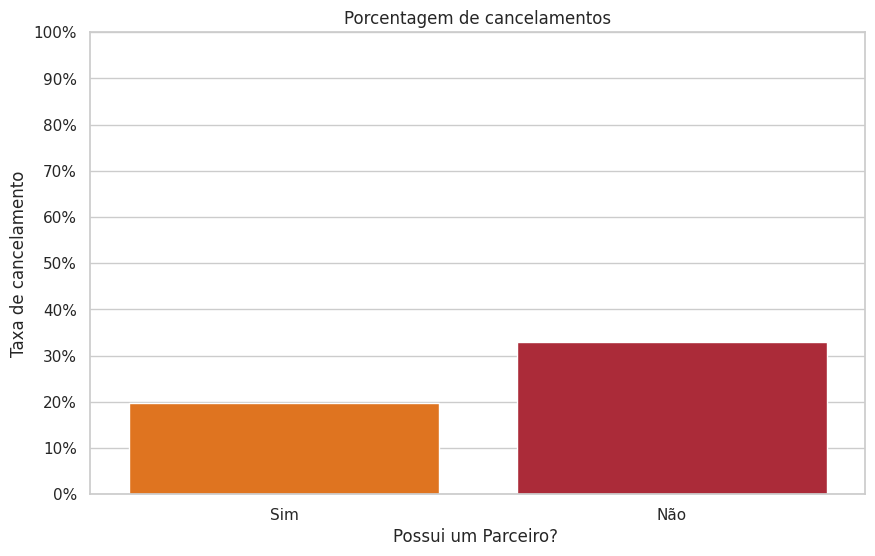

In [25]:
# Análise em relação a taxa de cancelamento
plot_tx_cancelamento_comparacao(data=dataset,
                                 x_col="Partner",
                                 y_col="ChurnPercentage",
                                 title="Porcentagem de cancelamentos",
                                 xlabel="Possui um Parceiro? ",
                                 ylabel="Taxa de cancelamento",
                                 colors=["#ff7000", "#c11528"],
                                 xticklabels=['Sim', 'Não'] )

### **Informações extraídas até o momento**

- A nossa base de dados possui cerca de 7043 clientes.
- A nossa váriavel alvo é o campo *Churn*
- Dentro da nossa base existem apenas 11 valores ausentes, cerca de 0.007% da nossa base. Como é uma amostra pequena podemos até mesma deletar esses dados, ou substituí-los atráves de alguma técnica.
- Grande parte dos dados estão em formato de *object* ou seja são dados categóricos. Será necessário convertê-los para dados númericos posteriormente.
- Mais de 25% dos clientes abandoram o serviço, ou seja para cada 4 clientes 1 abandona a empresa.

- A maioria dos clientes  não são  idosos (> 80%).
- A taxa de desistência de Idosos (> 40%). Os clientes mais jovens é (< 25%)
- Os mais velhos cancelam mais do que os clientes mais jovens.

- A distribuição entre os genêros é quase igual.
- A taxa de desistência  entre os genêros é quase a mesma também.
- Isso indica que taxa de desistência não tem relação com o gênero.

- Cerca de 70% dos clientes não possuem dependentes.
- Observa-se que clientes que não possuem dependentes possuem taxa de cancelamento (>30%).
- Podemos dizer que clientes que possuem dependentes costumam permanecer por mais tempo em relação aos demais.

- A distribuição dos clientes que possuem/não possuem um parceiro é quase igual.
- Em relação a taxa de cancelamentos, obeservamos que clientes que não possuem parceiro tem uma taxa de cancelamento maior (>30%).



## **Análises ​​da conta dos clientes**

### Análise individual sobre os meses de permanência do cliente (*tenure*) e a relação dessa informação com a taxa de cancelamento

Essa coluna é numerica, logo nossa análise será diferente

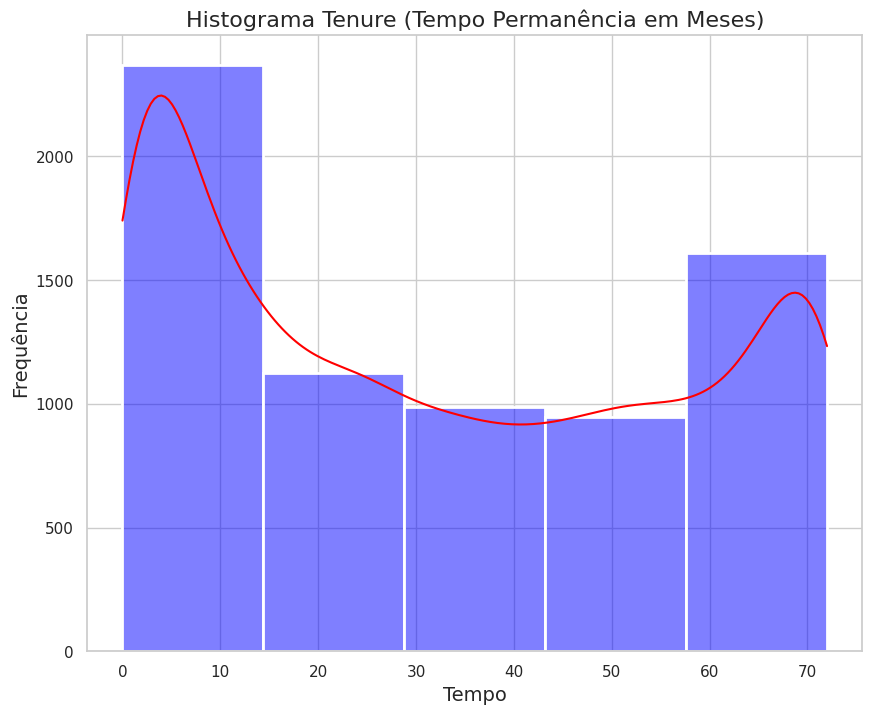

In [26]:
plt.figure(figsize=(10, 8))

# Plotar o histograma
sns.histplot(dataset['tenure'], bins=5, kde=True, color='blue', linewidth=2)

# Adicionar rótulos aos eixos
plt.xlabel('Tempo', fontsize=14)
plt.ylabel('Frequência', fontsize=14)


plt.title('Histograma Tenure (Tempo Permanência em Meses)', fontsize=16)

plt.gca().lines[0].set_color('red')
plt.show()


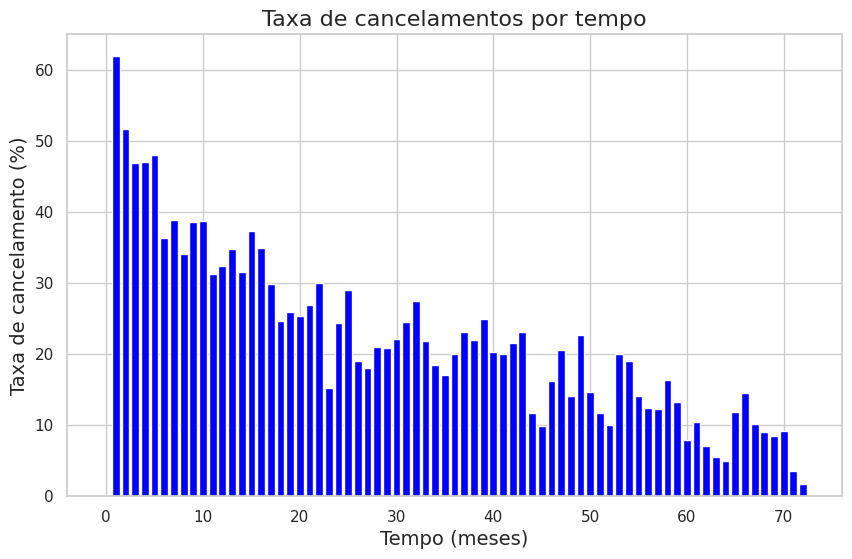

In [27]:
# Calcular a taxa de cancelamento para cada período de permanencia
tenure_churn_rate = dataset.groupby('tenure')['ChurnNum'].mean() * 100


tenure_churn_df = pd.DataFrame({'Tenure': tenure_churn_rate.index, 'Churn Rate (%)': tenure_churn_rate.values})

# Ordenar os dados pelo período de permanencia
tenure_churn_df = tenure_churn_df.sort_values(by='Tenure')


plt.figure(figsize=(10, 6))
plt.bar(tenure_churn_df['Tenure'], tenure_churn_df['Churn Rate (%)'], color='blue')
plt.xlabel('Tempo (meses)', fontsize=14)
plt.ylabel('Taxa de cancelamento (%)', fontsize=14)
plt.title('Taxa de cancelamentos por tempo', fontsize=16)
plt.show()


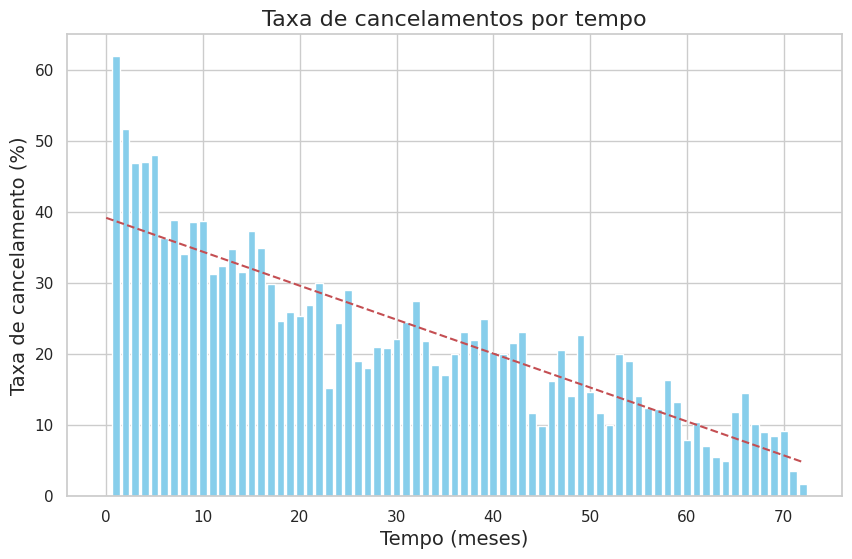

In [28]:
# Calcular a linha de tendência
z = np.polyfit(tenure_churn_df['Tenure'], tenure_churn_df['Churn Rate (%)'], 1)
p = np.poly1d(z)


plt.figure(figsize=(10, 6))
plt.bar(tenure_churn_df['Tenure'], tenure_churn_df['Churn Rate (%)'], color='skyblue')

# Adicionar a linha de tendência
plt.plot(tenure_churn_df['Tenure'], p(tenure_churn_df['Tenure']), "r--")
plt.xlabel('Tempo (meses)', fontsize=14)
plt.ylabel('Taxa de cancelamento (%)', fontsize=14)
plt.title('Taxa de cancelamentos por tempo', fontsize=16)
plt.show()


### **Informações extraídas até o momento**

- A nossa base de dados possui cerca de 7043 clientes.
- A nossa váriavel alvo é o campo *Churn*
- Dentro da nossa base existem apenas 11 valores ausentes, cerca de 0.007% da nossa base. Como é uma amostra pequena podemos até mesma deletar esses dados, ou substituí-los atráves de alguma técnica.
- Grande parte dos dados estão em formato de *object* ou seja são dados categóricos. Será necessário convertê-los para dados númericos posteriormente.
- Mais de 25% dos clientes abandoram o serviço, ou seja para cada 4 clientes 1 abandona a empresa.

- A maioria dos clientes  não são  idosos (> 80%).
- A taxa de desistência de Idosos (> 40%). Os clientes mais jovens é (< 25%)
- Os mais velhos cancelam mais do que os clientes mais jovens.

- A distribuição entre os genêros é quase igual.
- A taxa de desistência  entre os genêros é quase a mesma também.
- Isso indica que taxa de desistência não tem relação com o gênero.

- Cerca de 70% dos clientes não possuem dependentes.
- Observa-se que clientes que não possuem dependentes possuem taxa de cancelamento (>30%).
- Podemos dizer que clientes que possuem dependentes costumam permanecer por mais tempo em relação aos demais.

- A distribuição dos clientes que possuem/não possuem um parceiro é quase igual.
- Em relação a taxa de cancelamentos, obeservamos que clientes que não possuem parceiro tem uma taxa de cancelamento maior (>30%).

- Percebe-se que a maioria dos clientes cancela em aproximadamente 1 ano.
- Percebe-se também que um aumento nos clientes após 5 anos. Logo a taxa de cancelamento tende a diminuir ao longo do tempo.
- Quanto maior o tempo de cliente, menor a taxa de cancelamento. Portanto, a retenção de clientes recém-chegados (< 1 ano) é importante.



### Análise individual sobre o formato de contrato do cliente (*Contract*) e a relação dessa informação com a taxa de cancelamento

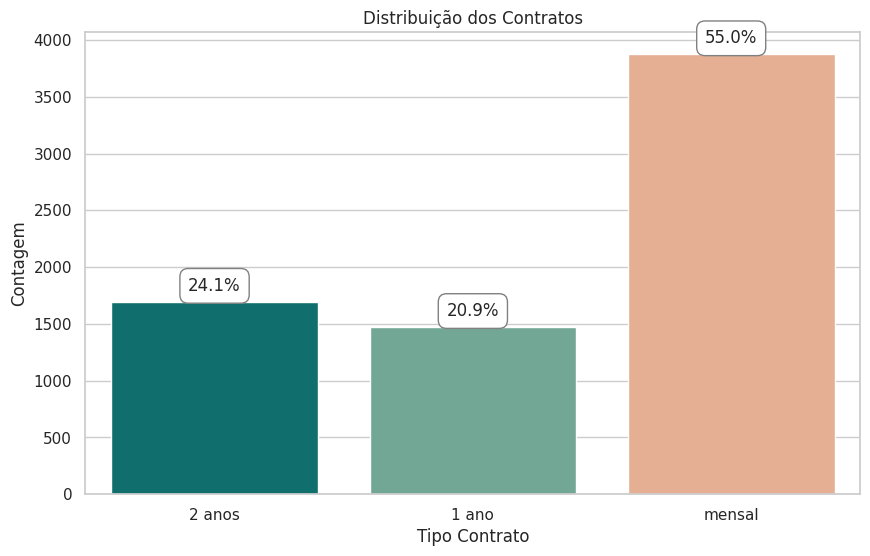

In [29]:
# Análise Individual
plot_distribuicao(nome_coluna='Contract',
                  data=dataset,
                  palette=custom_palette,
                  title='Distribuição dos Contratos',
                  x_label='Tipo Contrato',
                  y_label='Contagem',
                  rotation=0,
                  x_tick_labels=['2 anos', '1 ano', 'mensal']
                  )

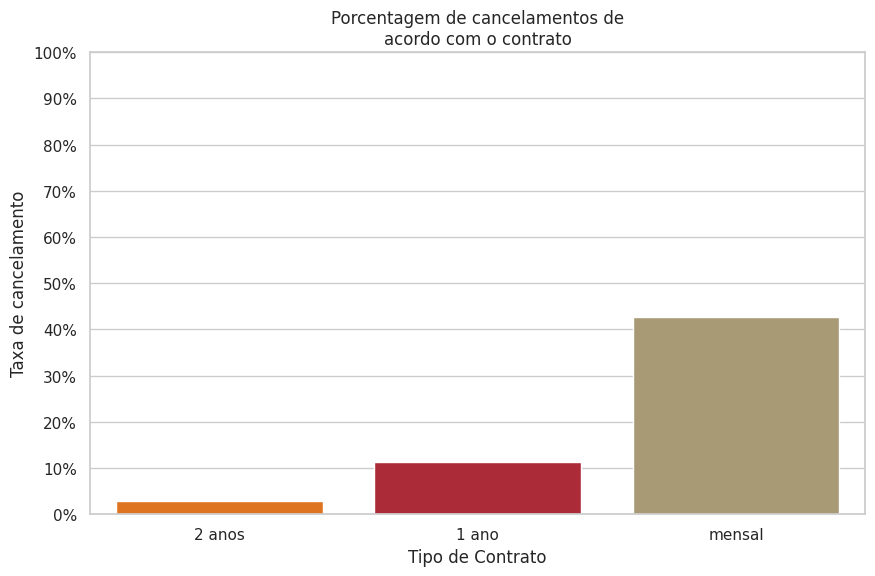

In [30]:
# Análise em relação a taxa de cancelamento
plot_tx_cancelamento_comparacao(data=dataset,
                                 x_col="Contract",
                                 y_col="ChurnPercentage",
                                 title="Porcentagem de cancelamentos de acordo com o contrato",
                                 xlabel="Tipo de Contrato",
                                 ylabel="Taxa de cancelamento",
                                 colors=["#ff7000", "#c11528","#b09e6d"],
                                 xticklabels=['2 anos', '1 ano', 'mensal']
                                )

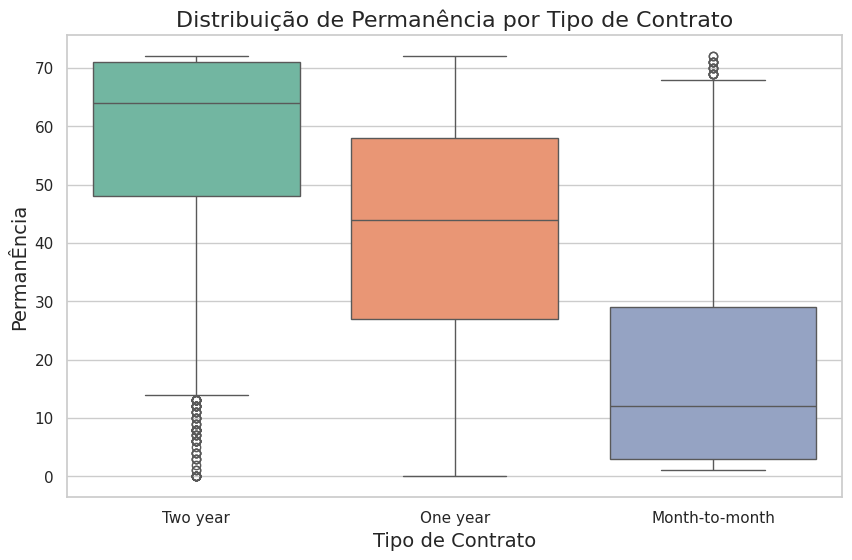

In [31]:
plt.figure(figsize=(10, 6))

# Plotar um boxplot
sns.boxplot(x='Contract', y='tenure', data=dataset, palette='Set2')
plt.xlabel('Tipo de Contrato', fontsize=14)
plt.ylabel('PermanÊncia', fontsize=14)
plt.title('Distribuição de Permanência por Tipo de Contrato', fontsize=16)
plt.show()


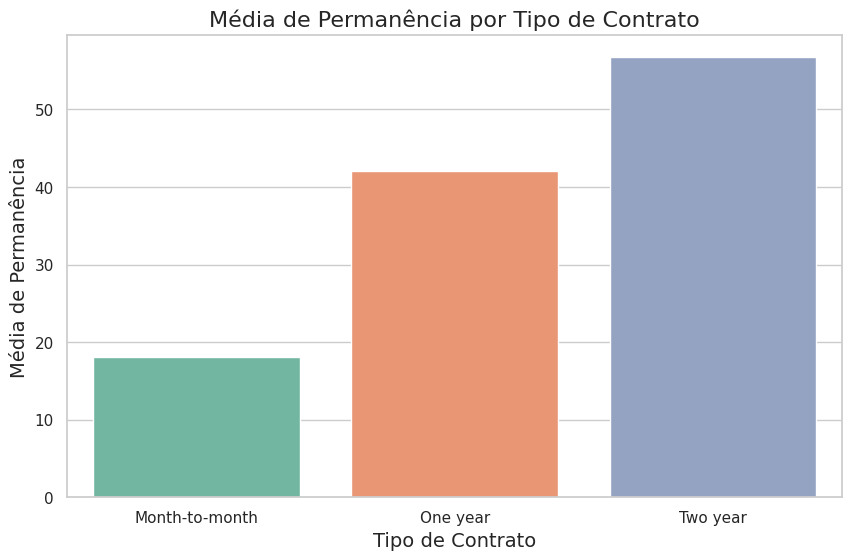

In [32]:
# Calcular a média de permanência para cada tipo de contrato
contract_tenure_mean = dataset.groupby('Contract')['tenure'].mean()

contract_tenure_df = contract_tenure_mean.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Contract', y='tenure', data=contract_tenure_df, palette='Set2')
plt.xlabel('Tipo de Contrato', fontsize=14)
plt.ylabel('Média de Permanência', fontsize=14)
plt.title('Média de Permanência por Tipo de Contrato', fontsize=16)
plt.show()


### **Informações extraídas até o momento**

- A nossa base de dados possui cerca de 7043 clientes.
- A nossa váriavel alvo é o campo *Churn*
- Dentro da nossa base existem apenas 11 valores ausentes, cerca de 0.007% da nossa base. Como é uma amostra pequena podemos até mesma deletar esses dados, ou substituí-los atráves de alguma técnica.
- Grande parte dos dados estão em formato de *object* ou seja são dados categóricos. Será necessário convertê-los para dados númericos posteriormente.
- Mais de 25% dos clientes abandoram o serviço, ou seja para cada 4 clientes 1 abandona a empresa.

- A maioria dos clientes  não são  idosos (> 80%).
- A taxa de desistência de Idosos (> 40%). Os clientes mais jovens é (< 25%)
- Os mais velhos cancelam mais do que os clientes mais jovens.

- A distribuição entre os genêros é quase igual.
- A taxa de desistência  entre os genêros é quase a mesma também.
- Isso indica que taxa de desistência não tem relação com o gênero.

- Cerca de 70% dos clientes não possuem dependentes.
- Observa-se que clientes que não possuem dependentes possuem taxa de cancelamento (>30%).
- Podemos dizer que clientes que possuem dependentes costumam permanecer por mais tempo em relação aos demais.

- A distribuição dos clientes que possuem/não possuem um parceiro é quase igual.
- Em relação a taxa de cancelamentos, obeservamos que clientes que não possuem parceiro tem uma taxa de cancelamento maior (>30%).

- Percebe-se que a maioria dos clientes cancela em aproximadamente 1 ano.
- Percebe-se também que um aumento nos clientes após 5 anos. Logo a taxa de cancelamento tende a diminuir ao longo do tempo.
- Quanto maior o tempo de cliente, menor a taxa de cancelamento. Portanto, a retenção de clientes recém-chegados (< 1 ano) é importante.

- Mais de 50% dos contratos, são contratos mensais, consequentemente a maior taxa de cancelamentos é mensal também.
- Já os outro formatos de contratos tem cerca de 20 % cada.
- Os contratos de 2 anos possuem a maior taxa de retenção, porém eles ainda demonstram taxas de cancelamentos.


### Análise individual se o cliente possui sua cobrançan sem papel(*PaperlessBilling*) e a relação dessa informação com a taxa de cancelamento

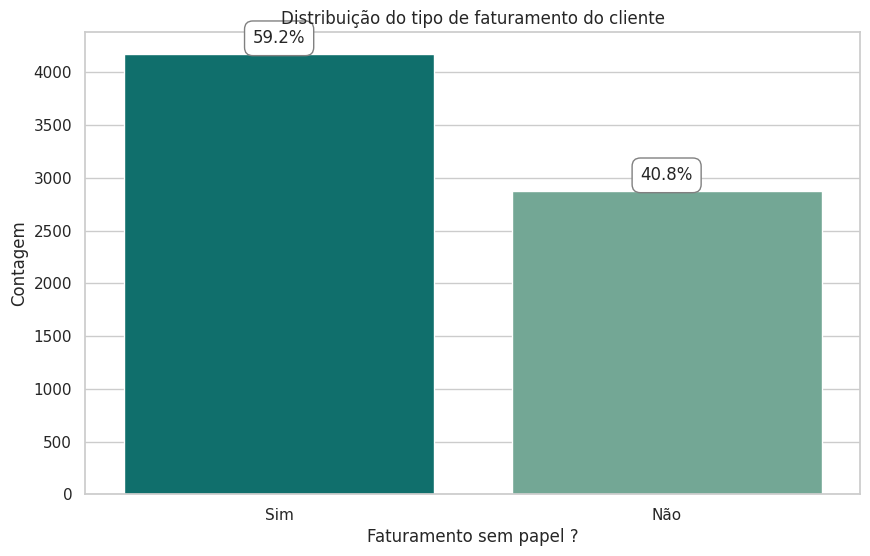

In [33]:
# Análise Individual
plot_distribuicao(nome_coluna='PaperlessBilling',
                  data=dataset,
                  palette=custom_palette,
                  title='Distribuição do tipo de faturamento do cliente',
                  x_label='Faturamento sem papel ?',
                  y_label='Contagem',
                  rotation=0,
                  x_tick_labels=['Sim', 'Não'])

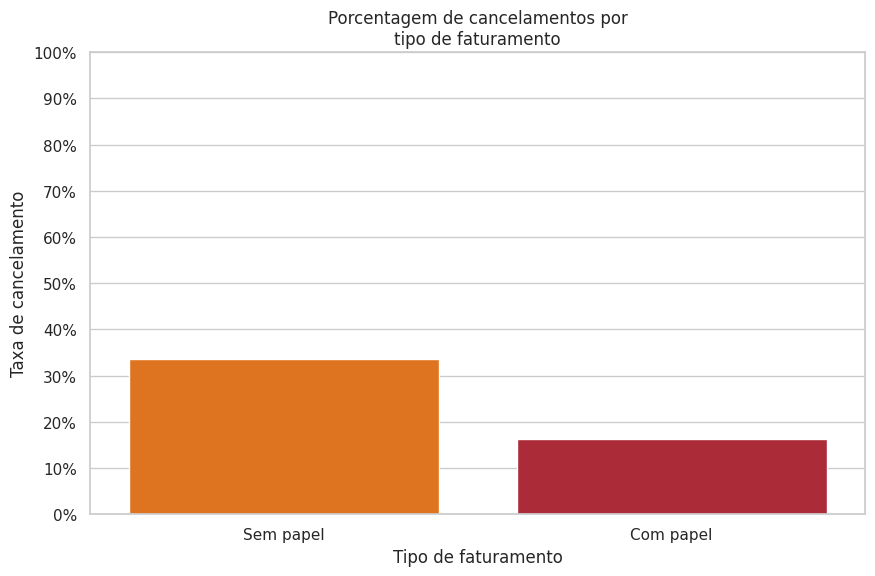

In [34]:
# Análise em relação a taxa de cancelamento
plot_tx_cancelamento_comparacao(data=dataset,
                                 x_col="PaperlessBilling",
                                 y_col="ChurnPercentage",
                                 title="Porcentagem de cancelamentos por tipo de faturamento",
                                 xlabel="Tipo de faturamento",
                                 ylabel="Taxa de cancelamento",
                                 colors=["#ff7000", "#c11528"],
                                 xticklabels=['Sem papel', 'Com papel'] )

### **Informações extraídas até o momento**

- A nossa base de dados possui cerca de 7043 clientes.
- A nossa váriavel alvo é o campo *Churn*
- Dentro da nossa base existem apenas 11 valores ausentes, cerca de 0.007% da nossa base. Como é uma amostra pequena podemos até mesma deletar esses dados, ou substituí-los atráves de alguma técnica.
- Grande parte dos dados estão em formato de *object* ou seja são dados categóricos. Será necessário convertê-los para dados númericos posteriormente.
- Mais de 25% dos clientes abandoram o serviço, ou seja para cada 4 clientes 1 abandona a empresa.

- A maioria dos clientes  não são  idosos (> 80%).
- A taxa de desistência de Idosos (> 40%). Os clientes mais jovens é (< 25%)
- Os mais velhos cancelam mais do que os clientes mais jovens.

- A distribuição entre os genêros é quase igual.
- A taxa de desistência  entre os genêros é quase a mesma também.
- Isso indica que taxa de desistência não tem relação com o gênero.

- Cerca de 70% dos clientes não possuem dependentes.
- Observa-se que clientes que não possuem dependentes possuem taxa de cancelamento (>30%).
- Podemos dizer que clientes que possuem dependentes costumam permanecer por mais tempo em relação aos demais.

- A distribuição dos clientes que possuem/não possuem um parceiro é quase igual.
- Em relação a taxa de cancelamentos, obeservamos que clientes que não possuem parceiro tem uma taxa de cancelamento maior (>30%).

- Percebe-se que a maioria dos clientes cancela em aproximadamente 1 ano.
- Percebe-se também que um aumento nos clientes após 5 anos. Logo a taxa de cancelamento tende a diminuir ao longo do tempo.
- Quanto maior o tempo de cliente, menor a taxa de cancelamento. Portanto, a retenção de clientes recém-chegados (< 1 ano) é importante.

- Mais de 50% dos contratos, são contratos mensais, consequentemente a maior taxa de cancelamentos é mensal também.
- Já os outro formatos de contratos tem cerca de 20 % cada.
- Os contratos de 2 anos possuem a maior taxa de retenção, porém eles ainda demonstram taxas de cancelamentos.

- Cerca 60% dos clientes possui faturamento sem papel.
- Consequentemente a taxa de cancelamentos também é maior (> 30%)





### Análise individual sobre o formato de pagamento do cliente (*PaymentMethod*) e a relação dessa informação com a taxa de cancelamento

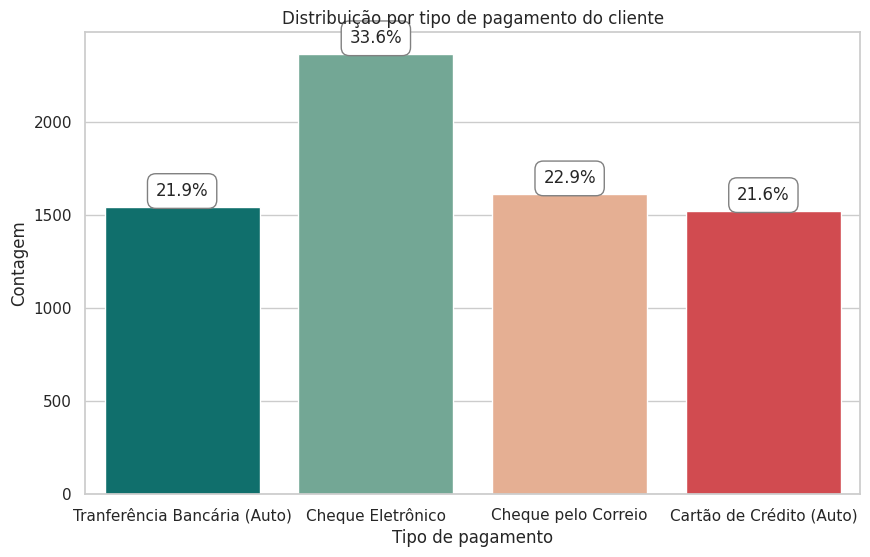

In [35]:
# Análise Individual
plot_distribuicao(nome_coluna='PaymentMethod',
                  data=dataset,
                  palette=custom_palette,
                  title='Distribuição por tipo de pagamento do cliente',
                  x_label='Tipo de pagamento',
                  y_label='Contagem',
                  rotation=0,
                  x_tick_labels=['Tranferência Bancária (Auto)', 'Cheque Eletrônico', 'Cheque pelo Correio','Cartão de Crédito (Auto)']
                  )

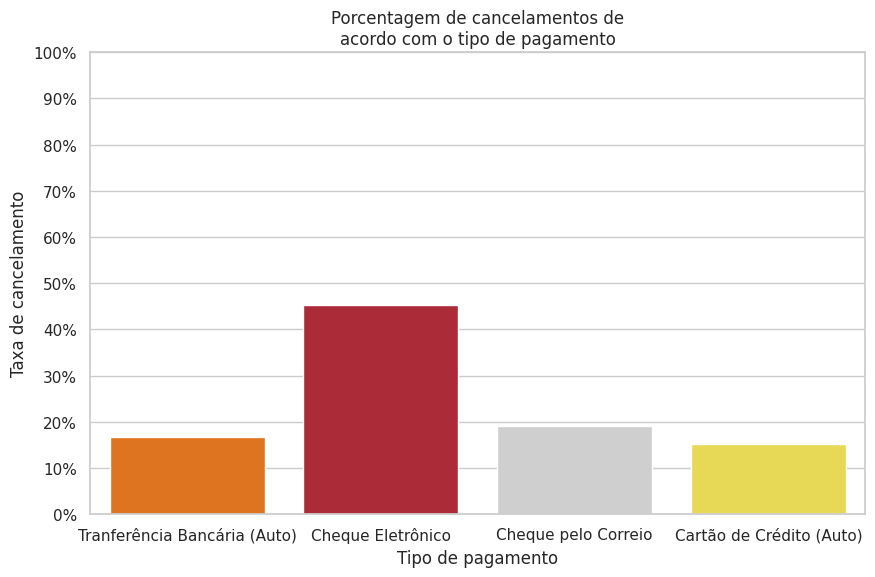

In [36]:
# Análise em relação a taxa de cancelamento
plot_tx_cancelamento_comparacao(data=dataset,
                                 x_col="PaymentMethod",
                                 y_col="ChurnPercentage",
                                 title="Porcentagem de cancelamentos de acordo com o tipo de pagamento",
                                 xlabel="Tipo de pagamento",
                                 ylabel="Taxa de cancelamento",
                                 colors=["#ff7000", "#c11528", "#cfcfcf", "#ffeb3e"],
                                 xticklabels=['Tranferência Bancária (Auto)', 'Cheque Eletrônico', 'Cheque pelo Correio','Cartão de Crédito (Auto)'] )

### **Informações extraídas até o momento**

- A nossa base de dados possui cerca de 7043 clientes.
- A nossa váriavel alvo é o campo *Churn*
- Dentro da nossa base existem apenas 11 valores ausentes, cerca de 0.007% da nossa base. Como é uma amostra pequena podemos até mesma deletar esses dados, ou substituí-los atráves de alguma técnica.
- Grande parte dos dados estão em formato de *object* ou seja são dados categóricos. Será necessário convertê-los para dados númericos posteriormente.
- Mais de 25% dos clientes abandoram o serviço, ou seja para cada 4 clientes 1 abandona a empresa.

- A maioria dos clientes  não são  idosos (> 80%).
- A taxa de desistência de Idosos (> 40%). Os clientes mais jovens é (< 25%)
- Os mais velhos cancelam mais do que os clientes mais jovens.

- A distribuição entre os genêros é quase igual.
- A taxa de desistência  entre os genêros é quase a mesma também.
- Isso indica que taxa de desistência não tem relação com o gênero.

- Cerca de 70% dos clientes não possuem dependentes.
- Observa-se que clientes que não possuem dependentes possuem taxa de cancelamento (>30%).
- Podemos dizer que clientes que possuem dependentes costumam permanecer por mais tempo em relação aos demais.

- A distribuição dos clientes que possuem/não possuem um parceiro é quase igual.
- Em relação a taxa de cancelamentos, obeservamos que clientes que não possuem parceiro tem uma taxa de cancelamento maior (>30%).

- Percebe-se que a maioria dos clientes cancela em aproximadamente 1 ano.
- Percebe-se também que um aumento nos clientes após 5 anos. Logo a taxa de cancelamento tende a diminuir ao longo do tempo.
- Quanto maior o tempo de cliente, menor a taxa de cancelamento. Portanto, a retenção de clientes recém-chegados (< 1 ano) é importante.

- Mais de 50% dos contratos, são contratos mensais, consequentemente a maior taxa de cancelamentos é mensal também.
- Já os outro formatos de contratos tem cerca de 20 % cada.
- Os contratos de 2 anos possuem a maior taxa de retenção, porém eles ainda demonstram taxas de cancelamentos.

- Cerca 60% dos clientes possui faturamento sem papel.
- Consequentemente a taxa de cancelamentos também é maior (> 30%)

- A preferência pela forma de pagamento de Cheque Eletronico é superior as demais, cerca de (>30%). Consequentemente esses clientes apresentam maior taxa de cancelamento dos serviços (> 40%). Já as outras formas demonstram taxas de cancelamento menores, cerca de 20 % menores.



### Análise individual sobre o valor cobrado do cliente mensalmente(*MonthlyCharges*) e a relação dessa informação com a taxa de cancelamento


Os dados estão no formato Object, foi realizada a conversão para o formato númerico.

In [37]:
# Convertendo a coluna para números float
dataset['MonthlyCharges'] = dataset['MonthlyCharges'].str.replace(',', '.').astype(float)


print(dataset['MonthlyCharges'].head())


0    118.75
1    118.65
2    118.60
3    118.60
4    118.35
Name: MonthlyCharges, dtype: float64


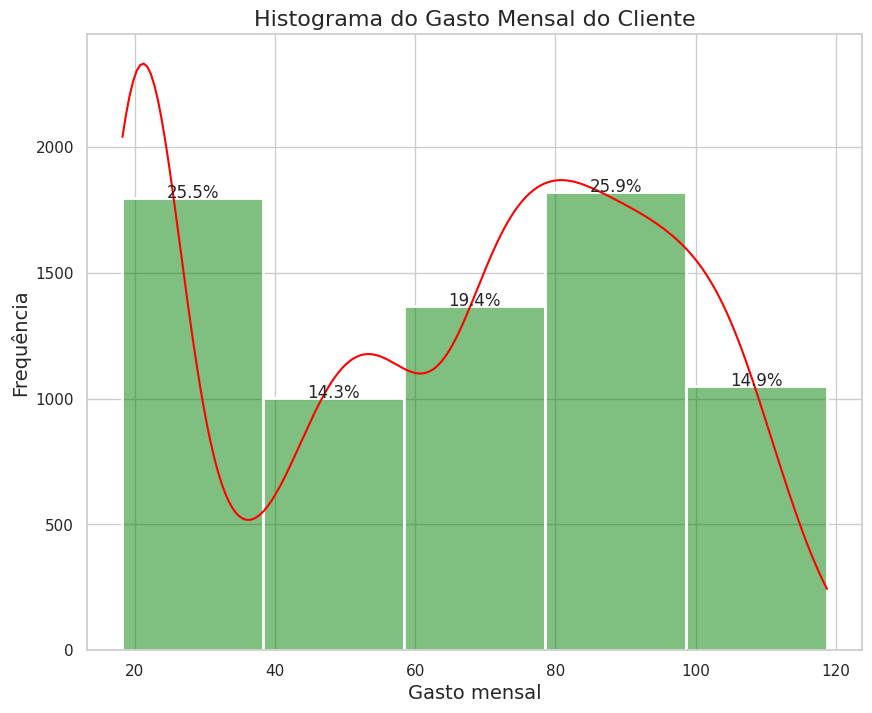

In [38]:
plt.figure(figsize=(10, 8))
ax = sns.histplot(dataset['MonthlyCharges'], bins=5, kde=True, color='green', linewidth=2)
plt.xlabel('Gasto mensal', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.title('Histograma do Gasto Mensal do Cliente', fontsize=16)
ax.lines[0].set_color('red')

# Calcular as porcentagens de cada barra
total_barras = len(dataset['MonthlyCharges'])
for retangulo in ax.patches:
    altura = retangulo.get_height()
    porcentagem = (altura / total_barras) * 100
    x = retangulo.get_x() + retangulo.get_width() / 2
    y = retangulo.get_y() + retangulo.get_height()
    ax.annotate(f'{porcentagem:.1f}%', (x, y), ha='center')

plt.show()


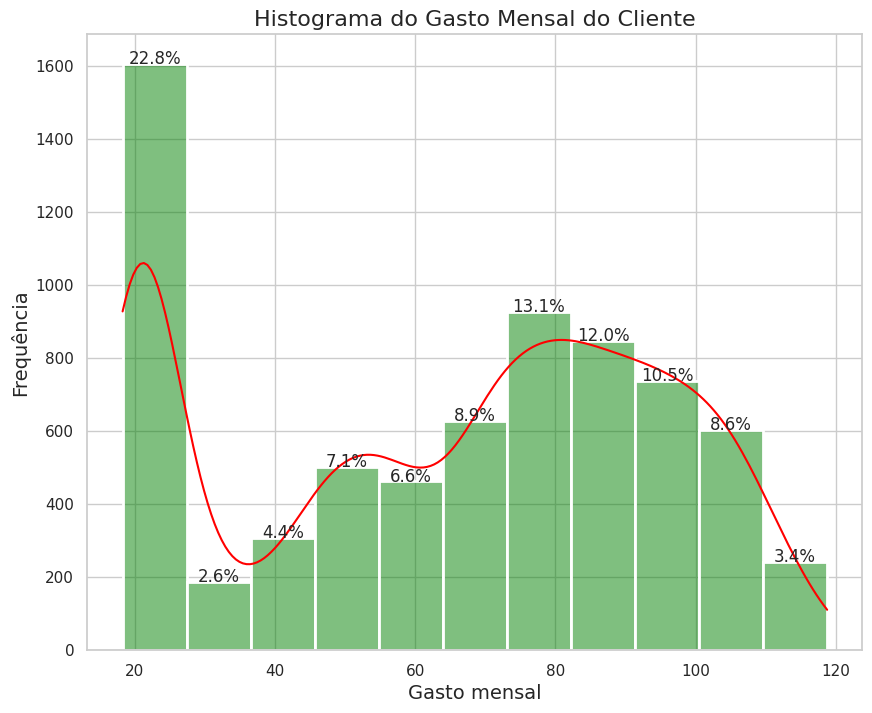

In [39]:
plt.figure(figsize=(10, 8))
ax = sns.histplot(dataset['MonthlyCharges'], bins=11, kde=True, color='green', linewidth=2)
plt.xlabel('Gasto mensal', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.title('Histograma do Gasto Mensal do Cliente', fontsize=16)
ax.lines[0].set_color('red')

# Calcular as porcentagens de cada barra
total_barras = len(dataset['MonthlyCharges'])
for retangulo in ax.patches:
    altura = retangulo.get_height()
    porcentagem = (altura / total_barras) * 100
    x = retangulo.get_x() + retangulo.get_width() / 2
    y = retangulo.get_y() + retangulo.get_height()
    ax.annotate(f'{porcentagem:.1f}%', (x, y), ha='center')

plt.show()


In [40]:
print(dataset['MonthlyCharges'].min())
print(dataset['MonthlyCharges'].max())

18.25
118.75


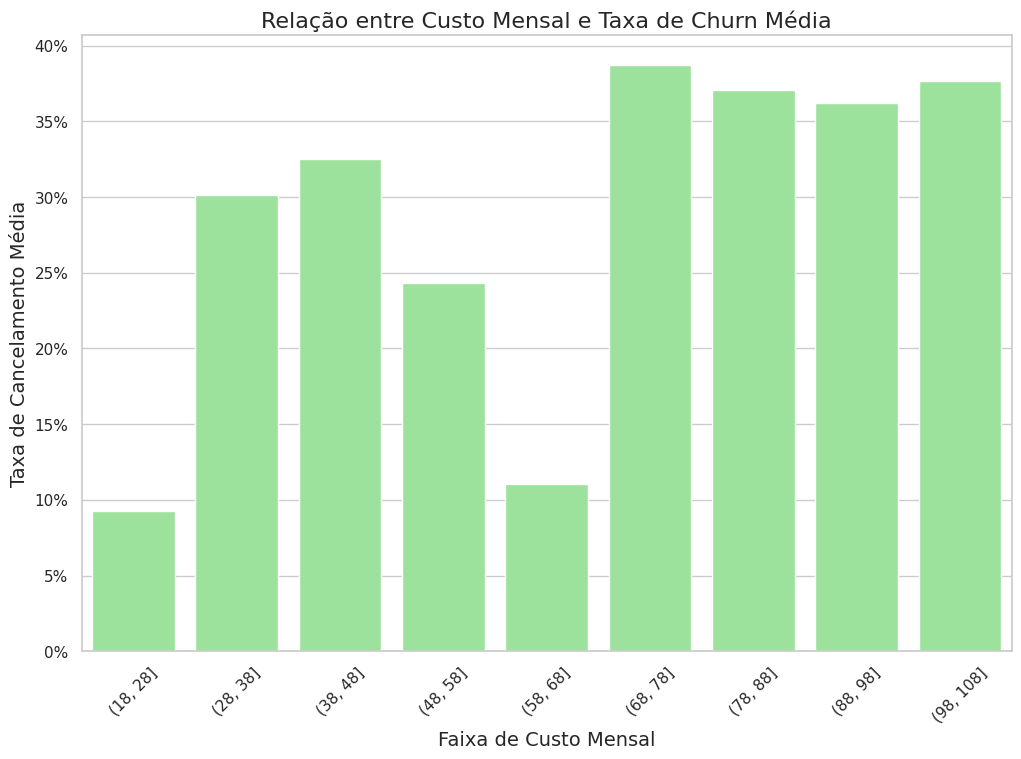

In [72]:
bins = list(range(18, 118, 10))

# Adicionar uma coluna ao dataset indicando a faixa de custo mensal
dataset['MonthlyCharges_Bins'] = pd.cut(dataset['MonthlyCharges'], bins=bins)
churn_by_monthly_charges = dataset.groupby('MonthlyCharges_Bins')['ChurnNum'].mean().reset_index()
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='MonthlyCharges_Bins', y='ChurnNum', data=churn_by_monthly_charges, color='Lightgreen')
plt.xlabel('Faixa de Custo Mensal', fontsize=14)
plt.ylabel('Taxa de Cancelamento Média', fontsize=14)
plt.title('Relação entre Custo Mensal e Taxa de Churn Média', fontsize=16)
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
plt.show()


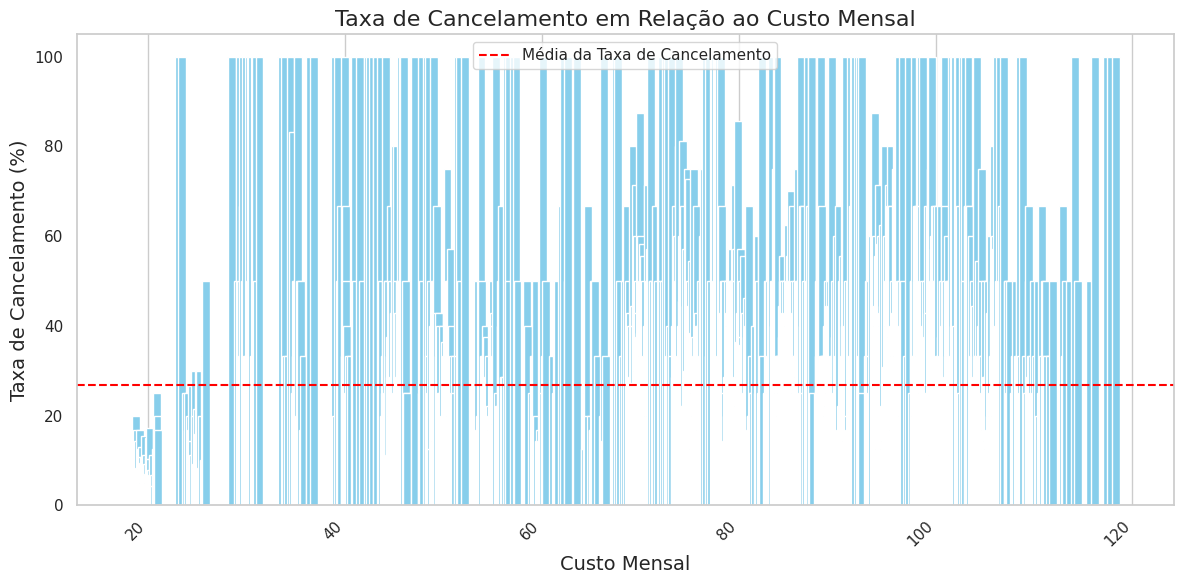

In [42]:
# Calcular a taxa de cancelamento para cada valor de 'MonthlyCharges'
monthly_churn_rate = dataset.groupby('MonthlyCharges')['ChurnNum'].mean() * 100
mean_churn_rate = monthly_churn_rate.mean()
monthly_churn_df = pd.DataFrame({'Monthly Charges': monthly_churn_rate.index, 'Churn Rate (%)': monthly_churn_rate.values})
monthly_churn_df = monthly_churn_df.sort_values(by='Monthly Charges')
plt.figure(figsize=(12, 6))
plt.bar(monthly_churn_df['Monthly Charges'], monthly_churn_df['Churn Rate (%)'], color='skyblue')

# Adicionar linha de média
plt.axhline(y=mean_churn_rate, color='red', linestyle='--', label='Média da Taxa de Cancelamento')
plt.xlabel('Custo Mensal', fontsize=14)
plt.ylabel('Taxa de Cancelamento (%)', fontsize=14)
plt.title('Taxa de Cancelamento em Relação ao Custo Mensal', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()


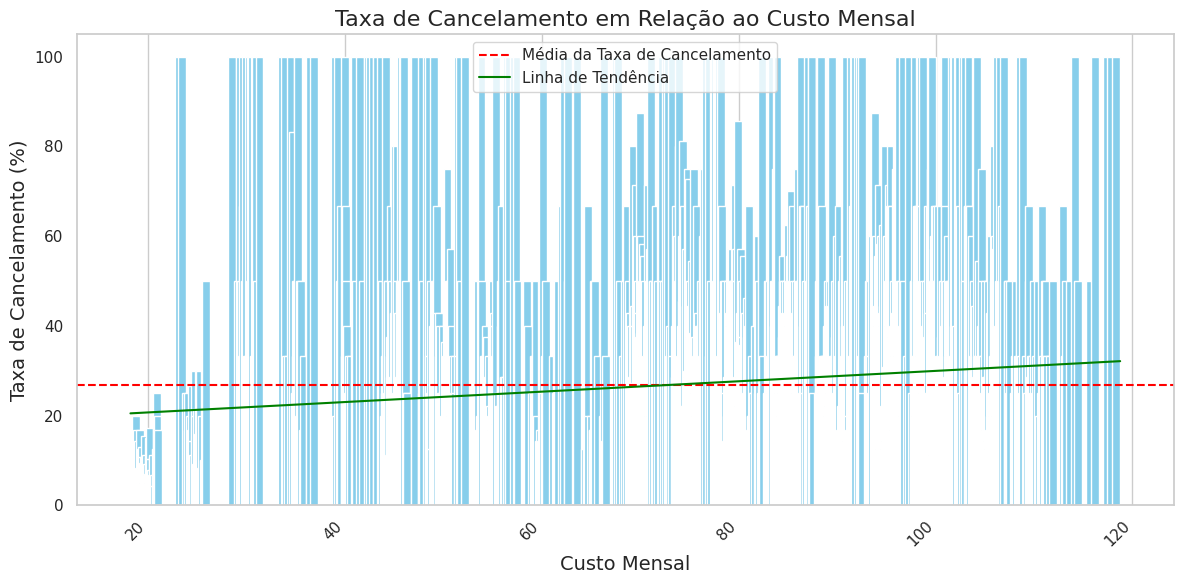

In [43]:
from sklearn.linear_model import LinearRegression

# Calcular a taxa de cancelamento para cada valor de 'MonthlyCharges'
monthly_churn_rate = dataset.groupby('MonthlyCharges')['ChurnNum'].mean() * 100
monthly_churn_df = pd.DataFrame({'Monthly Charges': monthly_churn_rate.index, 'Churn Rate (%)': monthly_churn_rate.values})
monthly_churn_df = monthly_churn_df.sort_values(by='Monthly Charges')

# Extrair variáveis independentes e dependentes
X = monthly_churn_df[['Monthly Charges']]
y = monthly_churn_df['Churn Rate (%)']

# Ajustar o modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

# Gerar previsões para os dados
y_pred = model.predict(X)

plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_churn_df['Monthly Charges'], monthly_churn_df['Churn Rate (%)'], color='skyblue')
mean_churn_rate = y.mean()
plt.axhline(y=mean_churn_rate, color='red', linestyle='--', label='Média da Taxa de Cancelamento')

# Plotar linha de tendência
plt.plot(X, y_pred, color='green', label='Linha de Tendência')
plt.xlabel('Custo Mensal', fontsize=14)
plt.ylabel('Taxa de Cancelamento (%)', fontsize=14)
plt.title('Taxa de Cancelamento em Relação ao Custo Mensal', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()


### **Informações extraídas até o momento**

- A nossa base de dados possui cerca de 7043 clientes.
- A nossa váriavel alvo é o campo *Churn*
- Dentro da nossa base existem apenas 11 valores ausentes, cerca de 0.007% da nossa base. Como é uma amostra pequena podemos até mesma deletar esses dados, ou substituí-los atráves de alguma técnica.
- Grande parte dos dados estão em formato de *object* ou seja são dados categóricos. Será necessário convertê-los para dados númericos posteriormente.
- Mais de 25% dos clientes abandoram o serviço, ou seja para cada 4 clientes 1 abandona a empresa.

- A maioria dos clientes  não são  idosos (> 80%).
- A taxa de desistência de Idosos (> 40%). Os clientes mais jovens é (< 25%)
- Os mais velhos cancelam mais do que os clientes mais jovens.

- A distribuição entre os genêros é quase igual.
- A taxa de desistência  entre os genêros é quase a mesma também.
- Isso indica que taxa de desistência não tem relação com o gênero.

- Cerca de 70% dos clientes não possuem dependentes.
- Observa-se que clientes que não possuem dependentes possuem taxa de cancelamento (>30%).
- Podemos dizer que clientes que possuem dependentes costumam permanecer por mais tempo em relação aos demais.

- A distribuição dos clientes que possuem/não possuem um parceiro é quase igual.
- Em relação a taxa de cancelamentos, obeservamos que clientes que não possuem parceiro tem uma taxa de cancelamento maior (>30%).

- Percebe-se que a maioria dos clientes cancela em aproximadamente 1 ano.
- Percebe-se também que um aumento nos clientes após 5 anos. Logo a taxa de cancelamento tende a diminuir ao longo do tempo.
- Quanto maior o tempo de cliente, menor a taxa de cancelamento. Portanto, a retenção de clientes recém-chegados (< 1 ano) é importante.

- Mais de 50% dos contratos, são contratos mensais, consequentemente a maior taxa de cancelamentos é mensal também.
- Já os outro formatos de contratos tem cerca de 20 % cada.
- Os contratos de 2 anos possuem a maior taxa de retenção, porém eles ainda demonstram taxas de cancelamentos.

- Cerca 60% dos clientes possui faturamento sem papel.
- Consequentemente a taxa de cancelamentos também é maior (> 30%)

- A preferência pela forma de pagamento de Cheque Eletronico é superior as demais, cerca de (>30%). Consequentemente esses clientes apresentam maior taxa de cancelamento dos serviços (> 40%). Já as outras formas demonstram taxas de cancelamento menores, cerca de 20 % menores.

- Muitos clientes usam planos baratos até 30, cerca de 24%. A taxa de cancelamento deles também é menor
- Clientes com planos de 18 até 28 e 58 até 68 possuem taxas baixas de cancelamento próximas a 10 %
- O intervalo de 68 até 108 possui a maior taxa de cancelamentos, acima de 35%
- Clientes com planos de 28 até 48 também possuem taxas de cancelamentos próximas a 30 %.


### Análise individual sobre o valor total cobrado do cliente (*TotalCharges*) e a relação dessa informação com a taxa de cancelamento
Os dados estão no formato Object, foi realizada a conversão para o formato númerico. Além disso existiam valores faltantes. Como a porcentagem era muito pequena eu optei por apagar os dados.

In [44]:
dataset = dataset.dropna(subset=['TotalCharges'])

In [45]:
dataset.shape

(7032, 24)

In [46]:
# Convertendo a coluna para números float
dataset['TotalCharges'] = dataset['TotalCharges'].str.replace(',', '.').astype(float)


print(dataset['TotalCharges'].head())


0    8672.45
1    8477.60
2    7990.05
3    7365.70
4    7804.15
Name: TotalCharges, dtype: float64


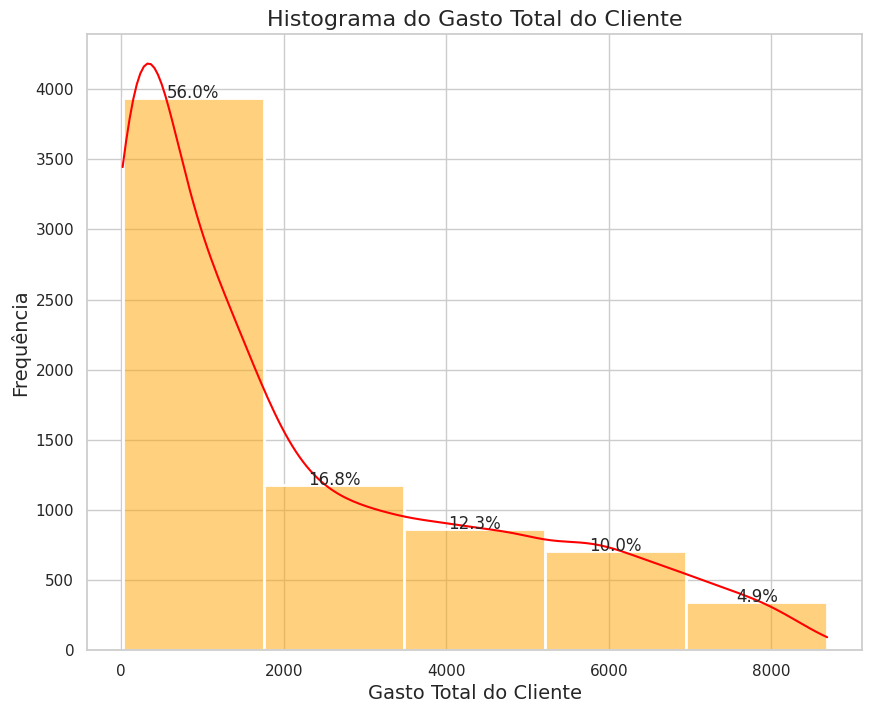

In [47]:
plt.figure(figsize=(10, 8))
ax = sns.histplot(dataset['TotalCharges'], bins=5, kde=True, color='orange', linewidth=2)
plt.xlabel('Gasto Total do Cliente', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.title('Histograma do Gasto Total do Cliente', fontsize=16)
ax.lines[0].set_color('red')

# Calcular as porcentagens de cada barra
total_barras = len(dataset['TotalCharges'])
for retangulo in ax.patches:
    altura = retangulo.get_height()
    porcentagem = (altura / total_barras) * 100
    x = retangulo.get_x() + retangulo.get_width() / 2
    y = retangulo.get_y() + retangulo.get_height()
    ax.annotate(f'{porcentagem:.1f}%', (x, y), ha='center')

plt.show()


In [48]:
print(dataset['TotalCharges'].min())
print(dataset['TotalCharges'].max())

18.8
8684.8


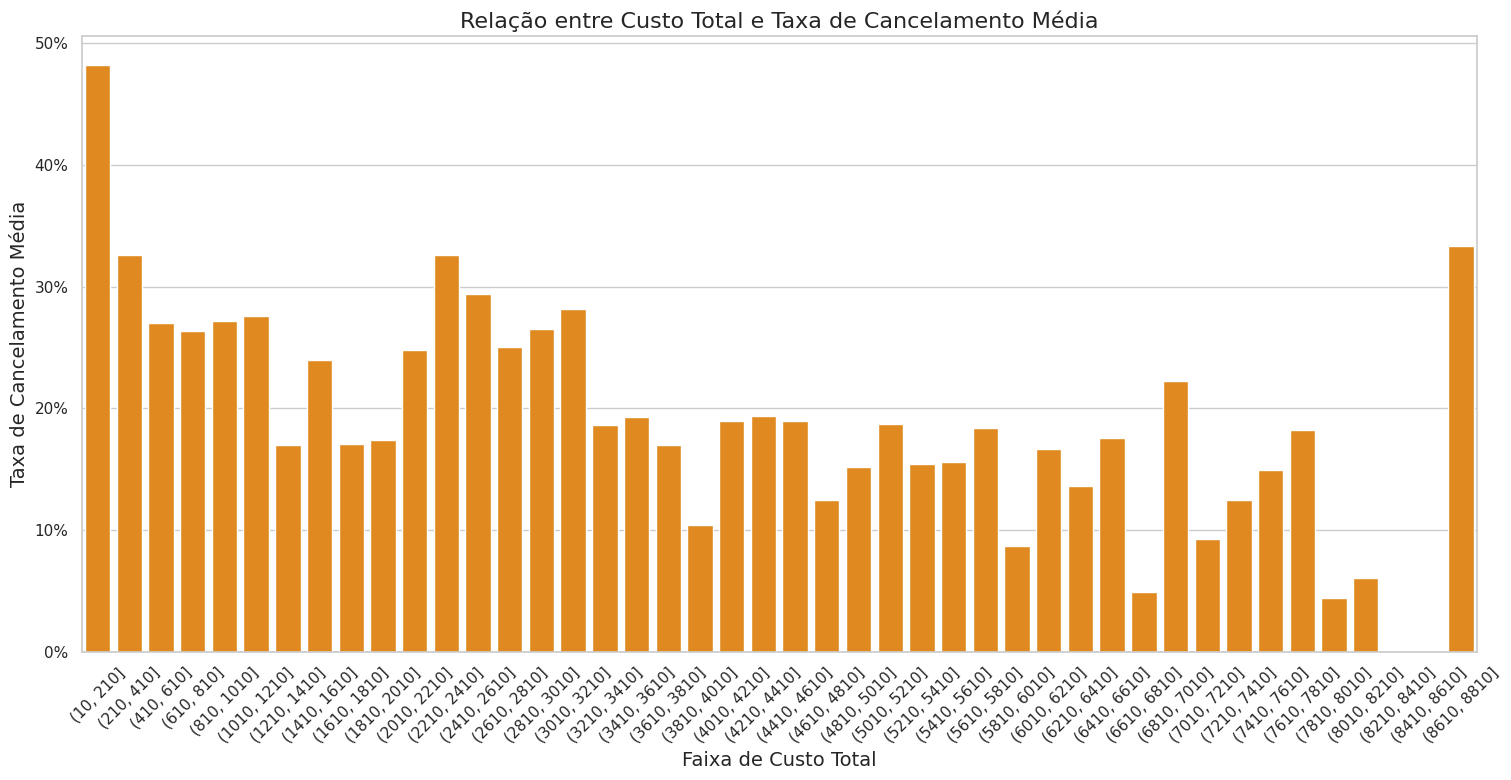

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar faixas de custo total em intervalos de 200
bins = list(range(10, 9000, 200))

# Adicionar uma coluna ao dataset indicando a faixa de custo total
dataset['TotalCharges_Bins'] = pd.cut(dataset['TotalCharges'], bins=bins)
churn_by_total_charges = dataset.groupby('TotalCharges_Bins')['ChurnNum'].mean().reset_index()
plt.figure(figsize=(18, 8))

ax = sns.barplot(x='TotalCharges_Bins', y='ChurnNum', data=churn_by_total_charges, color='darkorange')
plt.xlabel('Faixa de Custo Total', fontsize=14)
plt.ylabel('Taxa de Cancelamento Média', fontsize=14)
plt.title('Relação entre Custo Total e Taxa de Cancelamento Média', fontsize=16)

plt.xticks(rotation=45)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
plt.show()


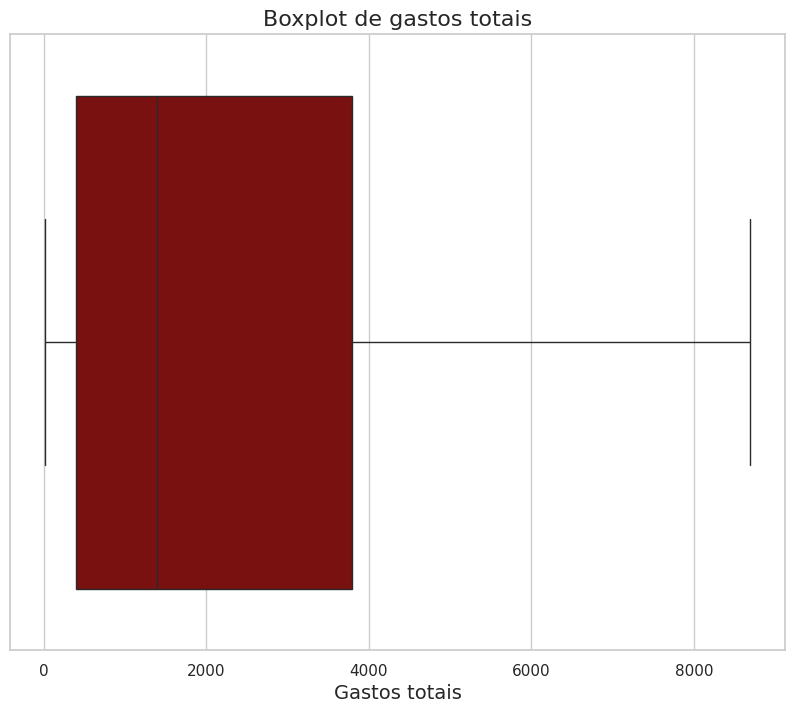

In [50]:
plt.figure(figsize=(10, 8))


sns.boxplot(x='TotalCharges', data=dataset, color='darkred')
plt.xlabel('Gastos totais', fontsize=14)
plt.title('Boxplot de gastos totais', fontsize=16)
plt.show()


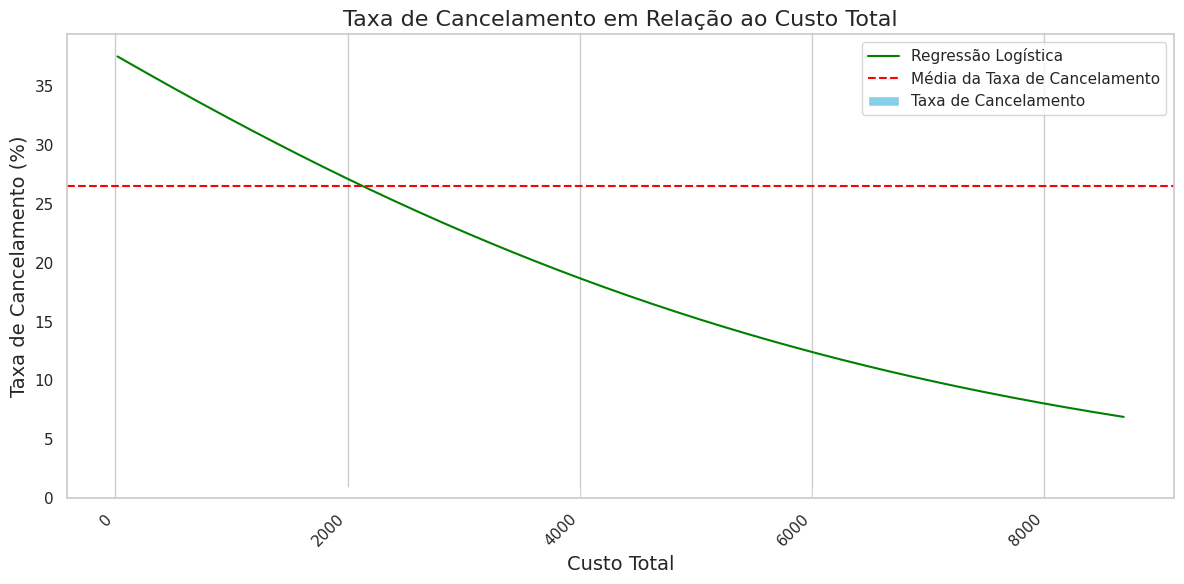

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np

# Calcular a taxa de cancelamento para cada valor de 'TotalCharges'
total_churn_rate = dataset.groupby('TotalCharges')['ChurnNum'].mean()
total_churn_df = pd.DataFrame({'Total Charges': total_churn_rate.index, 'Churn Rate (%)': total_churn_rate.values})
total_churn_df = total_churn_df.sort_values(by='Total Charges')

# Extrair variáveis independentes e dependentes
X = total_churn_df[['Total Charges']]
y = dataset.groupby('TotalCharges')['ChurnNum'].mean().apply(lambda x: 1 if x > 0 else 0).values  # Variável dependente binária

# Inicializar e ajustar o modelo de regressão logística
model = LogisticRegression()
model.fit(X, y)

# Gerar previsões para os dados
X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_pred = model.predict_proba(X_pred)[:, 1]

plt.figure(figsize=(12, 6))
bars = plt.bar(total_churn_df['Total Charges'], total_churn_df['Churn Rate (%)'], color='skyblue', label='Taxa de Cancelamento')
plt.plot(X_pred, y_pred * 100, color='green', label='Regressão Logística')
mean_churn_rate = y.mean() * 100
plt.axhline(y=mean_churn_rate, color='red', linestyle='--', label='Média da Taxa de Cancelamento')

plt.xlabel('Custo Total', fontsize=14)
plt.ylabel('Taxa de Cancelamento (%)', fontsize=14)
plt.title('Taxa de Cancelamento em Relação ao Custo Total', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()


### **Informações extraídas até o momento**

- A nossa base de dados possui cerca de 7043 clientes.
- A nossa váriavel alvo é o campo *Churn*
- Dentro da nossa base existem apenas 11 valores ausentes, cerca de 0.007% da nossa base. Como é uma amostra pequena podemos até mesma deletar esses dados, ou substituí-los atráves de alguma técnica.
- Grande parte dos dados estão em formato de *object* ou seja são dados categóricos. Será necessário convertê-los para dados númericos posteriormente.
- Mais de 25% dos clientes abandoram o serviço, ou seja para cada 4 clientes 1 abandona a empresa.

- A maioria dos clientes  não são  idosos (> 80%).
- A taxa de desistência de Idosos (> 40%). Os clientes mais jovens é (< 25%)
- Os mais velhos cancelam mais do que os clientes mais jovens.

- A distribuição entre os genêros é quase igual.
- A taxa de desistência  entre os genêros é quase a mesma também.
- Isso indica que taxa de desistência não tem relação com o gênero.

- Cerca de 70% dos clientes não possuem dependentes.
- Observa-se que clientes que não possuem dependentes possuem taxa de cancelamento (>30%).
- Podemos dizer que clientes que possuem dependentes costumam permanecer por mais tempo em relação aos demais.

- A distribuição dos clientes que possuem/não possuem um parceiro é quase igual.
- Em relação a taxa de cancelamentos, obeservamos que clientes que não possuem parceiro tem uma taxa de cancelamento maior (>30%).

- Percebe-se que a maioria dos clientes cancela em aproximadamente 1 ano.
- Percebe-se também que um aumento nos clientes após 5 anos. Logo a taxa de cancelamento tende a diminuir ao longo do tempo.
- Quanto maior o tempo de cliente, menor a taxa de cancelamento. Portanto, a retenção de clientes recém-chegados (< 1 ano) é importante.

- Mais de 50% dos contratos, são contratos mensais, consequentemente a maior taxa de cancelamentos é mensal também.
- Já os outro formatos de contratos tem cerca de 20 % cada.
- Os contratos de 2 anos possuem a maior taxa de retenção, porém eles ainda demonstram taxas de cancelamentos.

- Cerca 60% dos clientes possui faturamento sem papel.
- Consequentemente a taxa de cancelamentos também é maior (> 30%)

- A preferência pela forma de pagamento de Cheque Eletronico é superior as demais, cerca de (>30%). Consequentemente esses clientes apresentam maior taxa de cancelamento dos serviços (> 40%). Já as outras formas demonstram taxas de cancelamento menores, cerca de 20 % menores.

- Muitos clientes usam planos baratos até 30, cerca de 24%. A taxa de cancelamento deles também é menor
- Clientes com planos de 18 até 28 e 58 até 68 possuem taxas baixas de cancelamento próximas a 10 %
- O intervalo de 68 até 108 possui a maior taxa de cancelamentos, acima de 35%
- Clientes com planos de 28 até 48 também possuem taxas de cancelamentos próximas a 30 %.


- Cerca de 50 % tem um gasto total inferior a 2000 com planos. Eles também apresentam as maiores taxas de cancelamentos, próximos a 30 %.
- Clientes com gastos maiores que  8000 cerca de 4,8% dos clientes também possuem uma alta taxa de cancelamentos próxima de 50%, necessitando de atenção e análise com esses clientes.




## **Análises ​​de serviços ao cliente**.

### Análise individual se o cliente possui serviço de telefonia (*PhoneServices*) e a relação dessa informação com a taxa de cancelamento

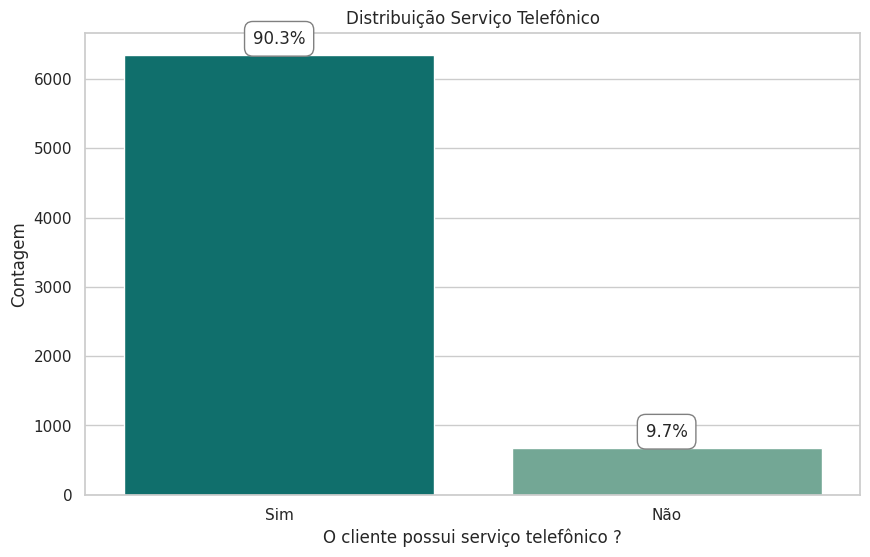

In [52]:
# Análise Individual
plot_distribuicao(nome_coluna='PhoneService',
                  data=dataset,
                  palette=custom_palette,
                  title='Distribuição Serviço Telefônico',
                  x_label='O cliente possui serviço telefônico ?',
                  y_label='Contagem',
                  rotation=0,
                  x_tick_labels=['Sim', 'Não'])

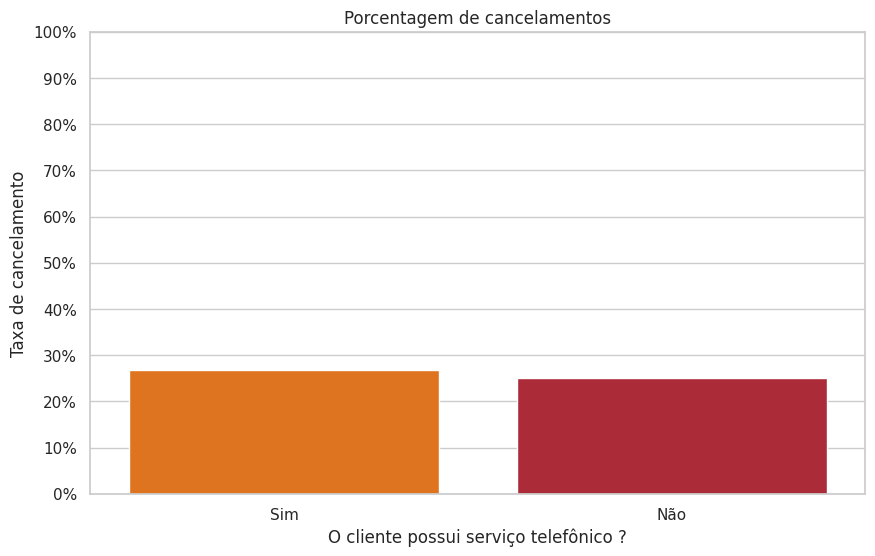

In [53]:
# Análise em relação a taxa de cancelamento
plot_tx_cancelamento_comparacao(data=dataset,
                                 x_col="PhoneService",
                                 y_col="ChurnPercentage",
                                 title="Porcentagem de cancelamentos",
                                 xlabel="O cliente possui serviço telefônico ?",
                                 ylabel="Taxa de cancelamento",
                                 colors=["#ff7000", "#c11528"],
                                 xticklabels=['Sim', 'Não'] )

### **Informações extraídas até o momento**

- A nossa base de dados possui cerca de 7043 clientes.
- A nossa váriavel alvo é o campo *Churn*
- Dentro da nossa base existem apenas 11 valores ausentes, cerca de 0.007% da nossa base. Como é uma amostra pequena podemos até mesma deletar esses dados, ou substituí-los atráves de alguma técnica.
- Grande parte dos dados estão em formato de *object* ou seja são dados categóricos. Será necessário convertê-los para dados númericos posteriormente.
- Mais de 25% dos clientes abandoram o serviço, ou seja para cada 4 clientes 1 abandona a empresa.

- A maioria dos clientes  não são  idosos (> 80%).
- A taxa de desistência de Idosos (> 40%). Os clientes mais jovens é (< 25%)
- Os mais velhos cancelam mais do que os clientes mais jovens.

- A distribuição entre os genêros é quase igual.
- A taxa de desistência  entre os genêros é quase a mesma também.
- Isso indica que taxa de desistência não tem relação com o gênero.

- Cerca de 70% dos clientes não possuem dependentes.
- Observa-se que clientes que não possuem dependentes possuem taxa de cancelamento (>30%).
- Podemos dizer que clientes que possuem dependentes costumam permanecer por mais tempo em relação aos demais.

- A distribuição dos clientes que possuem/não possuem um parceiro é quase igual.
- Em relação a taxa de cancelamentos, obeservamos que clientes que não possuem parceiro tem uma taxa de cancelamento maior (>30%).

- Percebe-se que a maioria dos clientes cancela em aproximadamente 1 ano.
- Percebe-se também que um aumento nos clientes após 5 anos. Logo a taxa de cancelamento tende a diminuir ao longo do tempo.
- Quanto maior o tempo de cliente, menor a taxa de cancelamento. Portanto, a retenção de clientes recém-chegados (< 1 ano) é importante.

- Mais de 50% dos contratos, são contratos mensais, consequentemente a maior taxa de cancelamentos é mensal também.
- Já os outro formatos de contratos tem cerca de 20 % cada.
- Os contratos de 2 anos possuem a maior taxa de retenção, porém eles ainda demonstram taxas de cancelamentos.

- Cerca 60% dos clientes possui faturamento sem papel.
- Consequentemente a taxa de cancelamentos também é maior (> 30%)

- A preferência pela forma de pagamento de Cheque Eletronico é superior as demais, cerca de (>30%). Consequentemente esses clientes apresentam maior taxa de cancelamento dos serviços (> 40%). Já as outras formas demonstram taxas de cancelamento menores, cerca de 20 % menores.

- Muitos clientes usam planos baratos até 30, cerca de 24%. A taxa de cancelamento deles também é menor
- Clientes com planos de 18 até 28 e 58 até 68 possuem taxas baixas de cancelamento próximas a 10 %
- O intervalo de 68 até 108 possui a maior taxa de cancelamentos, acima de 35%
- Clientes com planos de 28 até 48 também possuem taxas de cancelamentos próximas a 30 %.


- Cerca de 50 % tem um gasto total inferior a 2000 com planos. Eles também apresentam as maiores taxas de cancelamentos, próximos a 30 %.
- Clientes com gastos maiores que  8000 cerca de 4,8% dos clientes também possuem uma alta taxa de cancelamentos próxima de 50%, necessitando de atenção e análise com esses clientes.


- Mais de 90% possuem serviço telefônico, a taxa de cancelamento é praticamente igual para esses dados, cerca de 30%.


### Análise individual se o cliente possui múltiplas linhas de serviço de telefonia (*Multiplelines*) e a relação dessa informação com a taxa de cancelamento

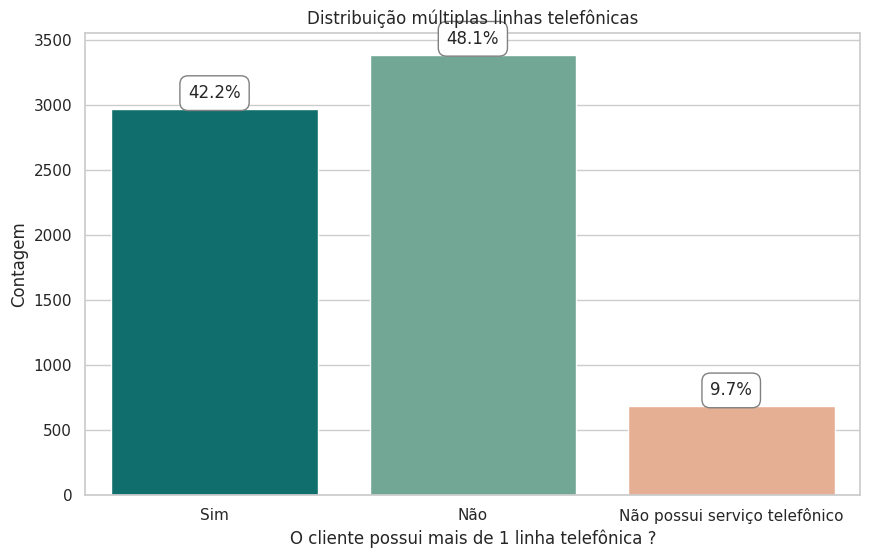

In [54]:
# Análise Individual
plot_distribuicao(nome_coluna='MultipleLines',
                  data=dataset,
                  palette=custom_palette,
                  title='Distribuição múltiplas linhas telefônicas',
                  x_label='O cliente possui mais de 1 linha telefônica ?',
                  y_label='Contagem',
                  rotation=0,
                  x_tick_labels=['Sim', 'Não', 'Não possui serviço telefônico']
                  )

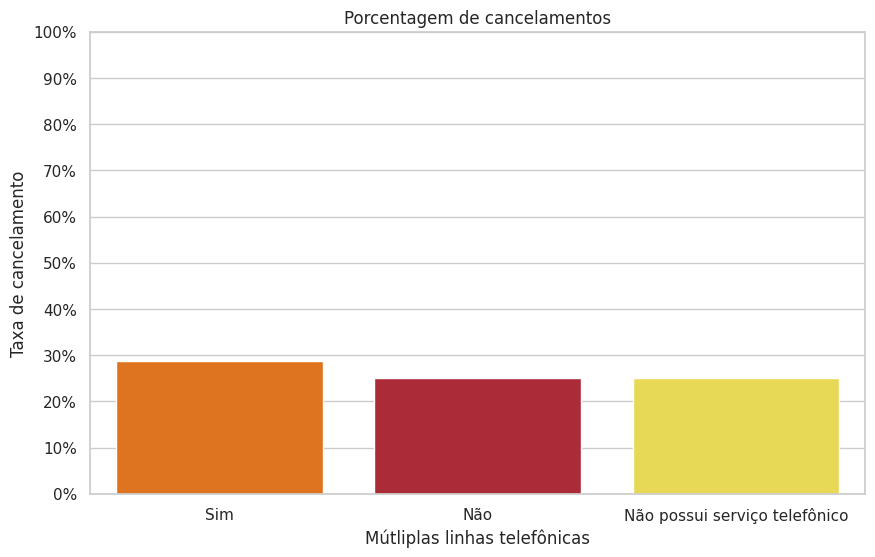

In [55]:
# Análise em relação a taxa de cancelamento
plot_tx_cancelamento_comparacao(data=dataset,
                                 x_col="MultipleLines",
                                 y_col="ChurnPercentage",
                                 title="Porcentagem de cancelamentos",
                                 xlabel="Mútliplas linhas telefônicas",
                                 ylabel="Taxa de cancelamento",
                                 colors=["#ff7000", "#c11528", "#ffeb3e"],
                                 xticklabels=['Sim', 'Não', 'Não possui serviço telefônico'] )

### **Informações extraídas até o momento**

- A nossa base de dados possui cerca de 7043 clientes.
- A nossa váriavel alvo é o campo *Churn*
- Dentro da nossa base existem apenas 11 valores ausentes, cerca de 0.007% da nossa base. Como é uma amostra pequena podemos até mesma deletar esses dados, ou substituí-los atráves de alguma técnica.
- Grande parte dos dados estão em formato de *object* ou seja são dados categóricos. Será necessário convertê-los para dados númericos posteriormente.
- Mais de 25% dos clientes abandoram o serviço, ou seja para cada 4 clientes 1 abandona a empresa.

- A maioria dos clientes  não são  idosos (> 80%).
- A taxa de desistência de Idosos (> 40%). Os clientes mais jovens é (< 25%)
- Os mais velhos cancelam mais do que os clientes mais jovens.

- A distribuição entre os genêros é quase igual.
- A taxa de desistência  entre os genêros é quase a mesma também.
- Isso indica que taxa de desistência não tem relação com o gênero.

- Cerca de 70% dos clientes não possuem dependentes.
- Observa-se que clientes que não possuem dependentes possuem taxa de cancelamento (>30%).
- Podemos dizer que clientes que possuem dependentes costumam permanecer por mais tempo em relação aos demais.

- A distribuição dos clientes que possuem/não possuem um parceiro é quase igual.
- Em relação a taxa de cancelamentos, obeservamos que clientes que não possuem parceiro tem uma taxa de cancelamento maior (>30%).

- Percebe-se que a maioria dos clientes cancela em aproximadamente 1 ano.
- Percebe-se também que um aumento nos clientes após 5 anos. Logo a taxa de cancelamento tende a diminuir ao longo do tempo.
- Quanto maior o tempo de cliente, menor a taxa de cancelamento. Portanto, a retenção de clientes recém-chegados (< 1 ano) é importante.

- Mais de 50% dos contratos, são contratos mensais, consequentemente a maior taxa de cancelamentos é mensal também.
- Já os outro formatos de contratos tem cerca de 20 % cada.
- Os contratos de 2 anos possuem a maior taxa de retenção, porém eles ainda demonstram taxas de cancelamentos.

- Cerca 60% dos clientes possui faturamento sem papel.
- Consequentemente a taxa de cancelamentos também é maior (> 30%)

- A preferência pela forma de pagamento de Cheque Eletronico é superior as demais, cerca de (>30%). Consequentemente esses clientes apresentam maior taxa de cancelamento dos serviços (> 40%). Já as outras formas demonstram taxas de cancelamento menores, cerca de 20 % menores.

- Muitos clientes usam planos baratos até 30, cerca de 24%. A taxa de cancelamento deles também é menor
- Clientes com planos de 18 até 28 e 58 até 68 possuem taxas baixas de cancelamento próximas a 10 %
- O intervalo de 68 até 108 possui a maior taxa de cancelamentos, acima de 35%
- Clientes com planos de 28 até 48 também possuem taxas de cancelamentos próximas a 30 %.


- Cerca de 50 % tem um gasto total inferior a 2000 com planos. Eles também apresentam as maiores taxas de cancelamentos, próximos a 30 %.
- Clientes com gastos maiores que  8000 cerca de 4,8% dos clientes também possuem uma alta taxa de cancelamentos próxima de 50%, necessitando de atenção e análise com esses clientes.


- Mais de 90% possuem serviço telefônico, a taxa de cancelamento é praticamente igual para esses dados, cerca de 30%.

- Cerca de 42% possui mais de uma linha telefonica e cerca de 48% possuem uma linha única.
- A taxa de cancelamentos é maior entre clientes com múltiplas linhas, (< 30%).

### Análise individual sobre provedor de internet do cliente (*InternetService*) e a relação dessa informação com a taxa de cancelamento

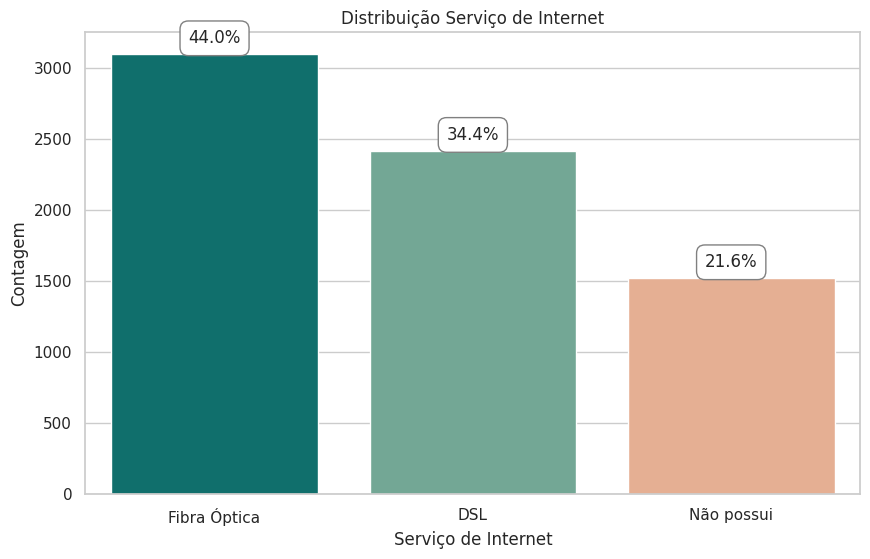

In [56]:
# Análise Individual
plot_distribuicao(nome_coluna='InternetService',
                  data=dataset,
                  palette=custom_palette,
                  title='Distribuição Serviço de Internet',
                  x_label='Serviço de Internet',
                  y_label='Contagem',
                  rotation=0,
                  x_tick_labels=['Fibra Óptica', 'DSL', 'Não possui']
                  )

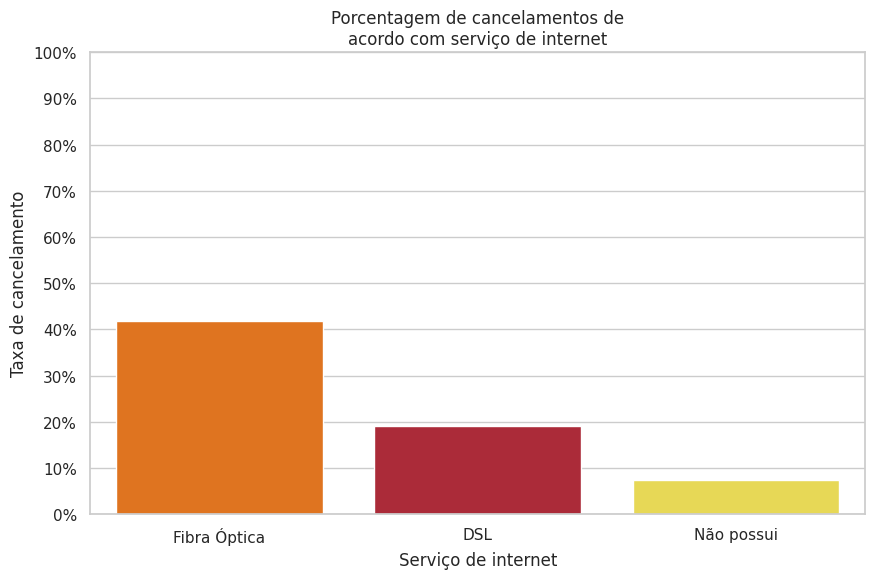

In [57]:
# Análise em relação a taxa de cancelamento
plot_tx_cancelamento_comparacao(data=dataset,
                                 x_col="InternetService",
                                 y_col="ChurnPercentage",
                                 title="Porcentagem de cancelamentos de acordo com serviço de internet",
                                 xlabel="Serviço de internet",
                                 ylabel="Taxa de cancelamento",
                                 colors=["#ff7000", "#c11528", "#ffeb3e"],
                                 xticklabels=['Fibra Óptica', 'DSL', 'Não possui'] )

### **Informações extraídas até o momento**

- A nossa base de dados possui cerca de 7043 clientes.
- A nossa váriavel alvo é o campo *Churn*
- Dentro da nossa base existem apenas 11 valores ausentes, cerca de 0.007% da nossa base. Como é uma amostra pequena podemos até mesma deletar esses dados, ou substituí-los atráves de alguma técnica.
- Grande parte dos dados estão em formato de *object* ou seja são dados categóricos. Será necessário convertê-los para dados númericos posteriormente.
- Mais de 25% dos clientes abandoram o serviço, ou seja para cada 4 clientes 1 abandona a empresa.

- A maioria dos clientes  não são  idosos (> 80%).
- A taxa de desistência de Idosos (> 40%). Os clientes mais jovens é (< 25%)
- Os mais velhos cancelam mais do que os clientes mais jovens.

- A distribuição entre os genêros é quase igual.
- A taxa de desistência  entre os genêros é quase a mesma também.
- Isso indica que taxa de desistência não tem relação com o gênero.

- Cerca de 70% dos clientes não possuem dependentes.
- Observa-se que clientes que não possuem dependentes possuem taxa de cancelamento (>30%).
- Podemos dizer que clientes que possuem dependentes costumam permanecer por mais tempo em relação aos demais.

- A distribuição dos clientes que possuem/não possuem um parceiro é quase igual.
- Em relação a taxa de cancelamentos, obeservamos que clientes que não possuem parceiro tem uma taxa de cancelamento maior (>30%).

- Percebe-se que a maioria dos clientes cancela em aproximadamente 1 ano.
- Percebe-se também que um aumento nos clientes após 5 anos. Logo a taxa de cancelamento tende a diminuir ao longo do tempo.
- Quanto maior o tempo de cliente, menor a taxa de cancelamento. Portanto, a retenção de clientes recém-chegados (< 1 ano) é importante.

- Mais de 50% dos contratos, são contratos mensais, consequentemente a maior taxa de cancelamentos é mensal também.
- Já os outro formatos de contratos tem cerca de 20 % cada.
- Os contratos de 2 anos possuem a maior taxa de retenção, porém eles ainda demonstram taxas de cancelamentos.

- Cerca 60% dos clientes possui faturamento sem papel.
- Consequentemente a taxa de cancelamentos também é maior (> 30%)

- A preferência pela forma de pagamento de Cheque Eletronico é superior as demais, cerca de (>30%). Consequentemente esses clientes apresentam maior taxa de cancelamento dos serviços (> 40%). Já as outras formas demonstram taxas de cancelamento menores, cerca de 20 % menores.

- Muitos clientes usam planos baratos até 30, cerca de 24%. A taxa de cancelamento deles também é menor
- Clientes com planos de 18 até 28 e 58 até 68 possuem taxas baixas de cancelamento próximas a 10 %
- O intervalo de 68 até 108 possui a maior taxa de cancelamentos, acima de 35%
- Clientes com planos de 28 até 48 também possuem taxas de cancelamentos próximas a 30 %.


- Cerca de 50 % tem um gasto total inferior a 2000 com planos. Eles também apresentam as maiores taxas de cancelamentos, próximos a 30 %.
- Clientes com gastos maiores que  8000 cerca de 4,8% dos clientes também possuem uma alta taxa de cancelamentos próxima de 50%, necessitando de atenção e análise com esses clientes.


- Mais de 90% possuem serviço telefônico, a taxa de cancelamento é praticamente igual para esses dados, cerca de 30%.

- Cerca de 42% possui mais de uma linha telefonica e cerca de 48% possuem uma linha única.
- A taxa de cancelamentos é maior entre clientes com múltiplas linhas, (< 30%).

- Cerca de 40% possuem serviços de internet de Fibra, a taxa de cancelamento dessas pessoas é superior a 40%. Cerca de 34% usam serviço DSL, a taxa de cancelamento deles é inferior a 20%.



### Análise individual sobre a segurança online do cliente (*OnlineSecurity*) e a relação dessa informação com a taxa de cancelamento

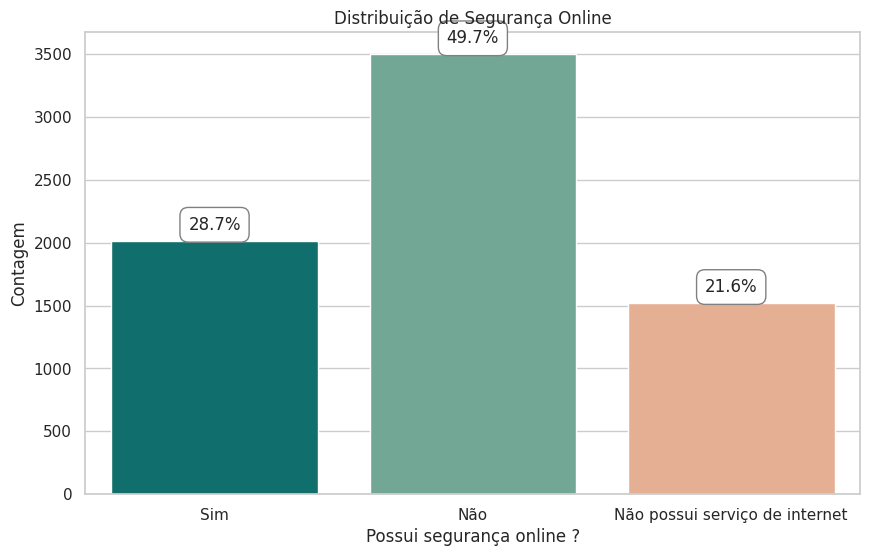

In [58]:
# Análise Individual
plot_distribuicao(nome_coluna='OnlineSecurity',
                  data=dataset,
                  palette=custom_palette,
                  title='Distribuição de Segurança Online',
                  x_label='Possui segurança online ?',
                  y_label='Contagem',
                  rotation=0,
                  x_tick_labels=['Sim', 'Não', 'Não possui serviço de internet']
                  )



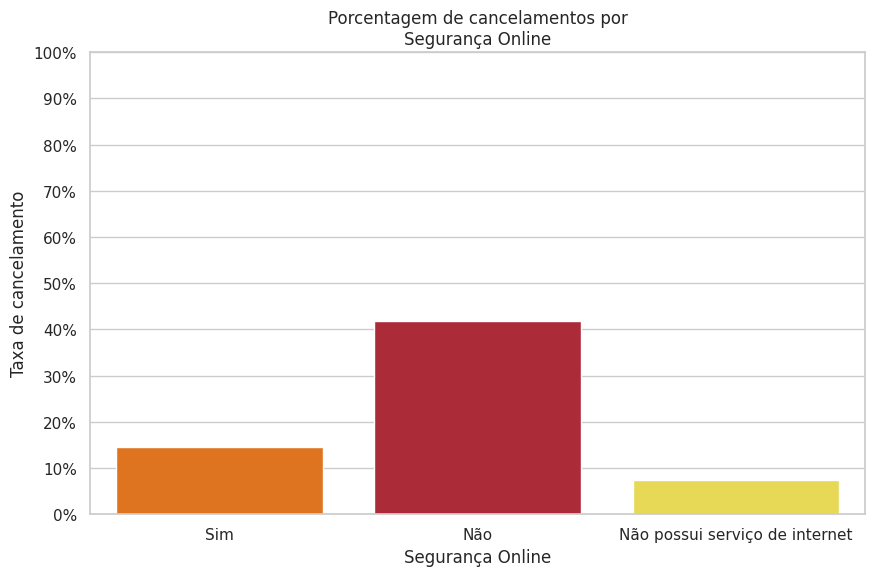

In [59]:
# Análise em relação à taxa de cancelamento
plot_tx_cancelamento_comparacao(data=dataset,
                                x_col="OnlineSecurity",
                                y_col="ChurnPercentage",
                                title="Porcentagem de cancelamentos por Segurança Online",
                                xlabel="Segurança Online",
                                ylabel="Taxa de cancelamento",
                                colors=["#ff7000", "#c11528", "#ffeb3e"],
                                xticklabels=['Sim', 'Não', 'Não possui serviço de internet']
                                )


### **Informações extraídas até o momento**

- A nossa base de dados possui cerca de 7043 clientes.
- A nossa váriavel alvo é o campo *Churn*
- Dentro da nossa base existem apenas 11 valores ausentes, cerca de 0.007% da nossa base. Como é uma amostra pequena podemos até mesma deletar esses dados, ou substituí-los atráves de alguma técnica.
- Grande parte dos dados estão em formato de *object* ou seja são dados categóricos. Será necessário convertê-los para dados númericos posteriormente.
- Mais de 25% dos clientes abandoram o serviço, ou seja para cada 4 clientes 1 abandona a empresa.

- A maioria dos clientes  não são  idosos (> 80%).
- A taxa de desistência de Idosos (> 40%). Os clientes mais jovens é (< 25%)
- Os mais velhos cancelam mais do que os clientes mais jovens.

- A distribuição entre os genêros é quase igual.
- A taxa de desistência  entre os genêros é quase a mesma também.
- Isso indica que taxa de desistência não tem relação com o gênero.

- Cerca de 70% dos clientes não possuem dependentes.
- Observa-se que clientes que não possuem dependentes possuem taxa de cancelamento (>30%).
- Podemos dizer que clientes que possuem dependentes costumam permanecer por mais tempo em relação aos demais.

- A distribuição dos clientes que possuem/não possuem um parceiro é quase igual.
- Em relação a taxa de cancelamentos, obeservamos que clientes que não possuem parceiro tem uma taxa de cancelamento maior (>30%).

- Percebe-se que a maioria dos clientes cancela em aproximadamente 1 ano.
- Percebe-se também que um aumento nos clientes após 5 anos. Logo a taxa de cancelamento tende a diminuir ao longo do tempo.
- Quanto maior o tempo de cliente, menor a taxa de cancelamento. Portanto, a retenção de clientes recém-chegados (< 1 ano) é importante.

- Mais de 50% dos contratos, são contratos mensais, consequentemente a maior taxa de cancelamentos é mensal também.
- Já os outro formatos de contratos tem cerca de 20 % cada.
- Os contratos de 2 anos possuem a maior taxa de retenção, porém eles ainda demonstram taxas de cancelamentos.

- Cerca 60% dos clientes possui faturamento sem papel.
- Consequentemente a taxa de cancelamentos também é maior (> 30%)

- A preferência pela forma de pagamento de Cheque Eletronico é superior as demais, cerca de (>30%). Consequentemente esses clientes apresentam maior taxa de cancelamento dos serviços (> 40%). Já as outras formas demonstram taxas de cancelamento menores, cerca de 20 % menores.

- Muitos clientes usam planos baratos até 30, cerca de 24%. A taxa de cancelamento deles também é menor
- Clientes com planos de 18 até 28 e 58 até 68 possuem taxas baixas de cancelamento próximas a 10 %
- O intervalo de 68 até 108 possui a maior taxa de cancelamentos, acima de 35%
- Clientes com planos de 28 até 48 também possuem taxas de cancelamentos próximas a 30 %.


- Cerca de 50 % tem um gasto total inferior a 2000 com planos. Eles também apresentam as maiores taxas de cancelamentos, próximos a 30 %.
- Clientes com gastos maiores que  8000 cerca de 4,8% dos clientes também possuem uma alta taxa de cancelamentos próxima de 50%, necessitando de atenção e análise com esses clientes.


- Mais de 90% possuem serviço telefônico, a taxa de cancelamento é praticamente igual para esses dados, cerca de 30%.

- Cerca de 42% possui mais de uma linha telefonica e cerca de 48% possuem uma linha única.
- A taxa de cancelamentos é maior entre clientes com múltiplas linhas, (< 30%).

- Cerca de 40% possuem serviços de internet de Fibra, a taxa de cancelamento dessas pessoas é superior a 40%. Cerca de 34% usam serviço DSL, a taxa de cancelamento deles é inferior a 20%.

-Cerca de 50% dos clientes não possuem serviços de segurança online,a taxa de cancelamentos desses clientes  é mais alta (> 40%).

### Análise individual sobre a existência de um backup online do cliente (*OnlineBackup*) e a relação dessa informação com a taxa de cancelamento

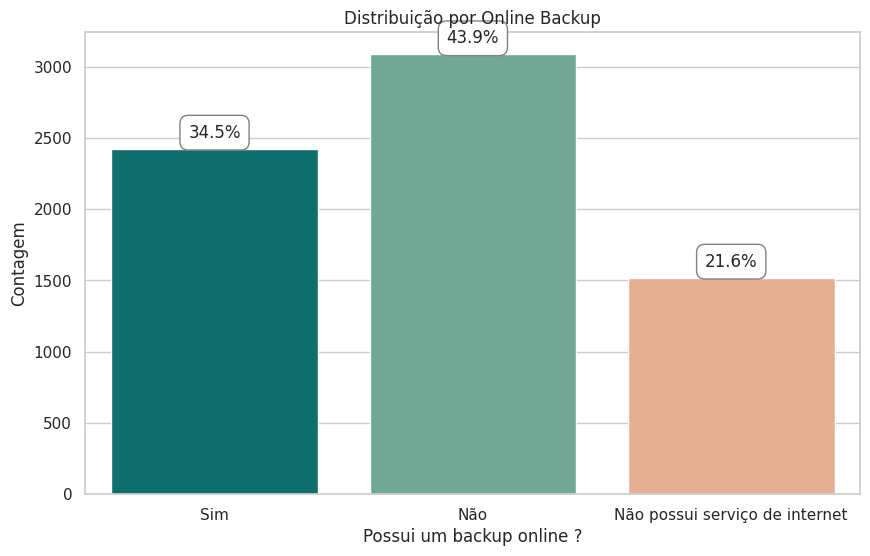

In [60]:
# Análise Individual
plot_distribuicao(nome_coluna='OnlineBackup',
                  data=dataset,
                  palette=custom_palette,
                  title='Distribuição por Online Backup',
                  x_label='Possui um backup online ?',
                  y_label='Contagem',
                  rotation=0,
                  x_tick_labels=['Sim', 'Não', 'Não possui serviço de internet']
                  )

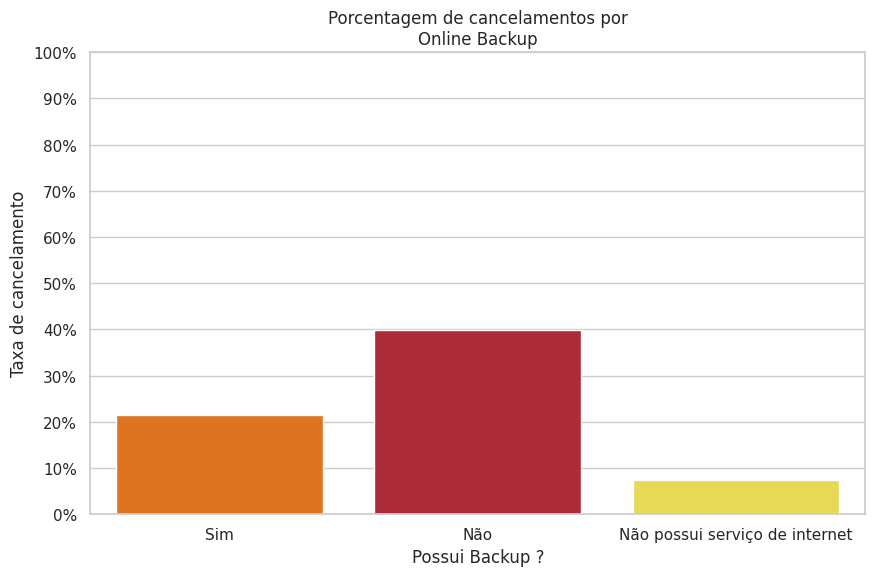

In [61]:
# Análise em relação à taxa de cancelamento
plot_tx_cancelamento_comparacao(data=dataset,
                                x_col="OnlineBackup",
                                y_col="ChurnPercentage",
                                title="Porcentagem de cancelamentos por Online Backup",
                                xlabel="Possui Backup ?",
                                ylabel="Taxa de cancelamento",
                                colors=["#ff7000", "#c11528", "#ffeb3e"],
                                xticklabels=['Sim', 'Não', 'Não possui serviço de internet']
                                )


### **Informações extraídas até o momento**

- A nossa base de dados possui cerca de 7043 clientes.
- A nossa váriavel alvo é o campo *Churn*
- Dentro da nossa base existem apenas 11 valores ausentes, cerca de 0.007% da nossa base. Como é uma amostra pequena podemos até mesma deletar esses dados, ou substituí-los atráves de alguma técnica.
- Grande parte dos dados estão em formato de *object* ou seja são dados categóricos. Será necessário convertê-los para dados númericos posteriormente.
- Mais de 25% dos clientes abandoram o serviço, ou seja para cada 4 clientes 1 abandona a empresa.

- A maioria dos clientes  não são  idosos (> 80%).
- A taxa de desistência de Idosos (> 40%). Os clientes mais jovens é (< 25%)
- Os mais velhos cancelam mais do que os clientes mais jovens.

- A distribuição entre os genêros é quase igual.
- A taxa de desistência  entre os genêros é quase a mesma também.
- Isso indica que taxa de desistência não tem relação com o gênero.

- Cerca de 70% dos clientes não possuem dependentes.
- Observa-se que clientes que não possuem dependentes possuem taxa de cancelamento (>30%).
- Podemos dizer que clientes que possuem dependentes costumam permanecer por mais tempo em relação aos demais.

- A distribuição dos clientes que possuem/não possuem um parceiro é quase igual.
- Em relação a taxa de cancelamentos, obeservamos que clientes que não possuem parceiro tem uma taxa de cancelamento maior (>30%).

- Percebe-se que a maioria dos clientes cancela em aproximadamente 1 ano.
- Percebe-se também que um aumento nos clientes após 5 anos. Logo a taxa de cancelamento tende a diminuir ao longo do tempo.
- Quanto maior o tempo de cliente, menor a taxa de cancelamento. Portanto, a retenção de clientes recém-chegados (< 1 ano) é importante.

- Mais de 50% dos contratos, são contratos mensais, consequentemente a maior taxa de cancelamentos é mensal também.
- Já os outro formatos de contratos tem cerca de 20 % cada.
- Os contratos de 2 anos possuem a maior taxa de retenção, porém eles ainda demonstram taxas de cancelamentos.

- Cerca 60% dos clientes possui faturamento sem papel.
- Consequentemente a taxa de cancelamentos também é maior (> 30%)

- A preferência pela forma de pagamento de Cheque Eletronico é superior as demais, cerca de (>30%). Consequentemente esses clientes apresentam maior taxa de cancelamento dos serviços (> 40%). Já as outras formas demonstram taxas de cancelamento menores, cerca de 20 % menores.

- Muitos clientes usam planos baratos até 30, cerca de 24%. A taxa de cancelamento deles também é menor
- Clientes com planos de 18 até 28 e 58 até 68 possuem taxas baixas de cancelamento próximas a 10 %
- O intervalo de 68 até 108 possui a maior taxa de cancelamentos, acima de 35%
- Clientes com planos de 28 até 48 também possuem taxas de cancelamentos próximas a 30 %.


- Cerca de 50 % tem um gasto total inferior a 2000 com planos. Eles também apresentam as maiores taxas de cancelamentos, próximos a 30 %.
- Clientes com gastos maiores que  8000 cerca de 4,8% dos clientes também possuem uma alta taxa de cancelamentos próxima de 50%, necessitando de atenção e análise com esses clientes.


- Mais de 90% possuem serviço telefônico, a taxa de cancelamento é praticamente igual para esses dados, cerca de 30%.

- Cerca de 42% possui mais de uma linha telefonica e cerca de 48% possuem uma linha única.
- A taxa de cancelamentos é maior entre clientes com múltiplas linhas, (< 30%).

- Cerca de 40% possuem serviços de internet de Fibra, a taxa de cancelamento dessas pessoas é superior a 40%. Cerca de 34% usam serviço DSL, a taxa de cancelamento deles é inferior a 20%.

- Cerca de 50% dos clientes não possuem serviços de segurança online,a taxa de cancelamentos desses clientes  é mais alta (> 40%).

- 43% dos clientes não possuem serviço de backup online, a taxa de cancelamentos desses clientes  é próxima de 40%.



### Análise individual sobre a existência de uma proteção para o dispositivo do cliente (*DeviceProtection*) e a relação dessa informação com a taxa de cancelamento

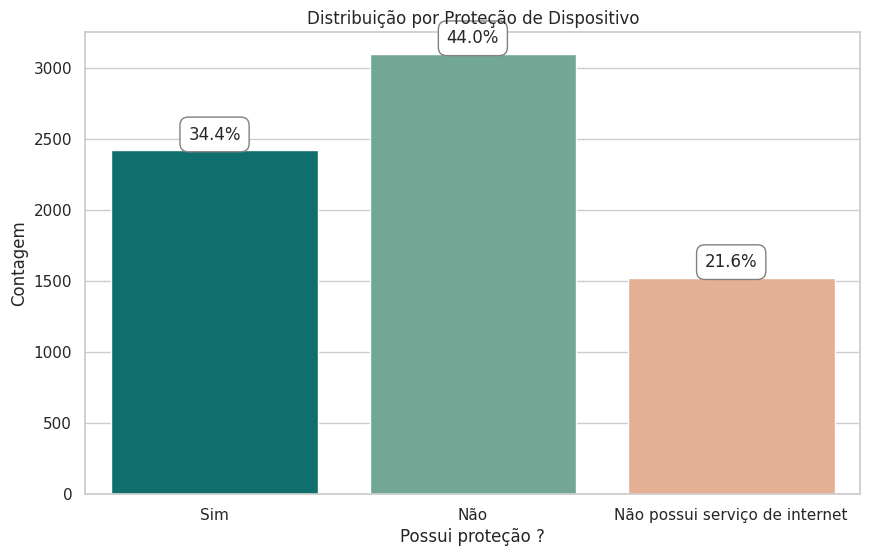

In [62]:
# Análise Individual
plot_distribuicao(nome_coluna='DeviceProtection',
                  data=dataset,
                  palette=custom_palette,
                  title='Distribuição por Proteção de Dispositivo',
                  x_label='Possui proteção ?',
                  y_label='Contagem',
                  rotation=0,
                  x_tick_labels=['Sim', 'Não', 'Não possui serviço de internet']
                  )

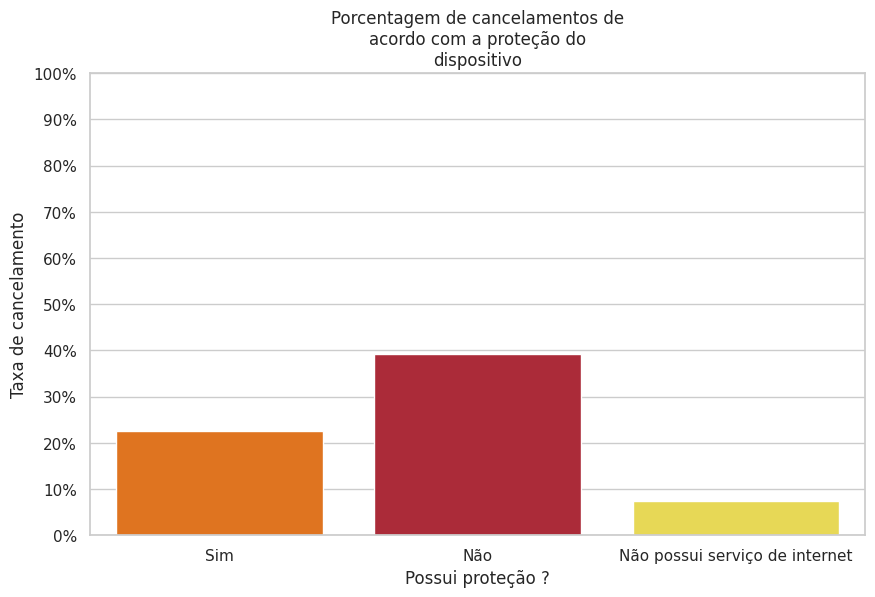

In [63]:
# Análise em relação a taxa de cancelamento
plot_tx_cancelamento_comparacao(data=dataset,
                                 x_col="DeviceProtection",
                                 y_col="ChurnPercentage",
                                 title="Porcentagem de cancelamentos de acordo com a proteção do dispositivo",
                                 xlabel="Possui proteção ?",
                                 ylabel="Taxa de cancelamento",
                                 colors=["#ff7000", "#c11528", "#ffeb3e"],
                                 xticklabels=['Sim', 'Não', 'Não possui serviço de internet'] )

### **Informações extraídas até o momento**

- A nossa base de dados possui cerca de 7043 clientes.
- A nossa váriavel alvo é o campo *Churn*
- Dentro da nossa base existem apenas 11 valores ausentes, cerca de 0.007% da nossa base. Como é uma amostra pequena podemos até mesma deletar esses dados, ou substituí-los atráves de alguma técnica.
- Grande parte dos dados estão em formato de *object* ou seja são dados categóricos. Será necessário convertê-los para dados númericos posteriormente.
- Mais de 25% dos clientes abandoram o serviço, ou seja para cada 4 clientes 1 abandona a empresa.

- A maioria dos clientes  não são  idosos (> 80%).
- A taxa de desistência de Idosos (> 40%). Os clientes mais jovens é (< 25%)
- Os mais velhos cancelam mais do que os clientes mais jovens.

- A distribuição entre os genêros é quase igual.
- A taxa de desistência  entre os genêros é quase a mesma também.
- Isso indica que taxa de desistência não tem relação com o gênero.

- Cerca de 70% dos clientes não possuem dependentes.
- Observa-se que clientes que não possuem dependentes possuem taxa de cancelamento (>30%).
- Podemos dizer que clientes que possuem dependentes costumam permanecer por mais tempo em relação aos demais.

- A distribuição dos clientes que possuem/não possuem um parceiro é quase igual.
- Em relação a taxa de cancelamentos, obeservamos que clientes que não possuem parceiro tem uma taxa de cancelamento maior (>30%).

- Percebe-se que a maioria dos clientes cancela em aproximadamente 1 ano.
- Percebe-se também que um aumento nos clientes após 5 anos. Logo a taxa de cancelamento tende a diminuir ao longo do tempo.
- Quanto maior o tempo de cliente, menor a taxa de cancelamento. Portanto, a retenção de clientes recém-chegados (< 1 ano) é importante.

- Mais de 50% dos contratos, são contratos mensais, consequentemente a maior taxa de cancelamentos é mensal também.
- Já os outro formatos de contratos tem cerca de 20 % cada.
- Os contratos de 2 anos possuem a maior taxa de retenção, porém eles ainda demonstram taxas de cancelamentos.

- Cerca 60% dos clientes possui faturamento sem papel.
- Consequentemente a taxa de cancelamentos também é maior (> 30%)

- A preferência pela forma de pagamento de Cheque Eletronico é superior as demais, cerca de (>30%). Consequentemente esses clientes apresentam maior taxa de cancelamento dos serviços (> 40%). Já as outras formas demonstram taxas de cancelamento menores, cerca de 20 % menores.

- Muitos clientes usam planos baratos até 30, cerca de 24%. A taxa de cancelamento deles também é menor
- Clientes com planos de 18 até 28 e 58 até 68 possuem taxas baixas de cancelamento próximas a 10 %
- O intervalo de 68 até 108 possui a maior taxa de cancelamentos, acima de 35%
- Clientes com planos de 28 até 48 também possuem taxas de cancelamentos próximas a 30 %.


- Cerca de 50 % tem um gasto total inferior a 2000 com planos. Eles também apresentam as maiores taxas de cancelamentos, próximos a 30 %.
- Clientes com gastos maiores que  8000 cerca de 4,8% dos clientes também possuem uma alta taxa de cancelamentos próxima de 50%, necessitando de atenção e análise com esses clientes.


- Mais de 90% possuem serviço telefônico, a taxa de cancelamento é praticamente igual para esses dados, cerca de 30%.

- Cerca de 42% possui mais de uma linha telefonica e cerca de 48% possuem uma linha única.
- A taxa de cancelamentos é maior entre clientes com múltiplas linhas, (< 30%).

- Cerca de 40% possuem serviços de internet de Fibra, a taxa de cancelamento dessas pessoas é superior a 40%. Cerca de 34% usam serviço DSL, a taxa de cancelamento deles é inferior a 20%.

- Cerca de 50% dos clientes não possuem serviços de segurança online,a taxa de cancelamentos desses clientes  é mais alta (> 40%).

- 43% dos clientes não possuem serviço de backup online, a taxa de cancelamentos desses clientes  é próxima de 40%.

- 44% dos clientes não possuem serviço de proteção de dispositivo, a taxa de cancelamentos desses clientes  é próxima de 40%.



### Análise individual sobre a existência de suporte técnico para o cliente (*TechSupport*) e a relação dessa informação com a taxa de cancelamento

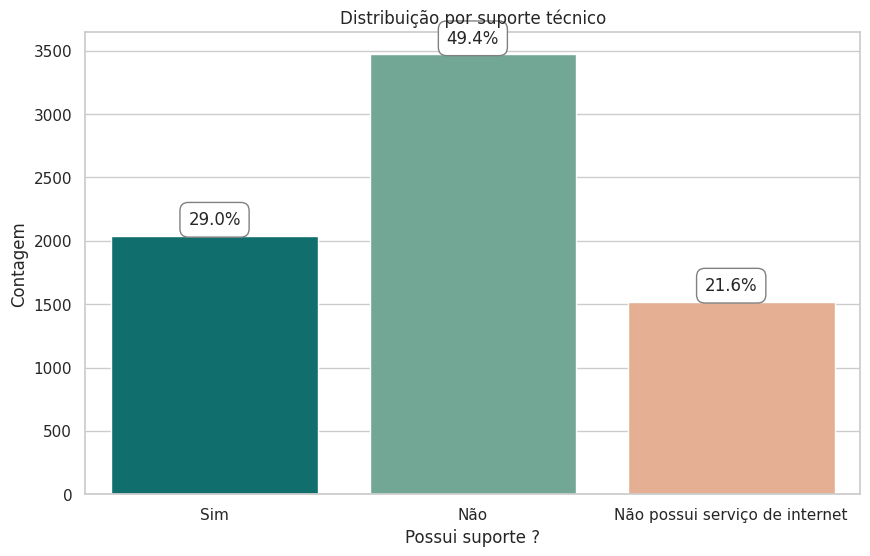

In [64]:
# Análise Individual
plot_distribuicao(nome_coluna='TechSupport',
                  data=dataset,
                  palette=custom_palette,
                  title='Distribuição por suporte técnico',
                  x_label='Possui suporte ?',
                  y_label='Contagem',
                  rotation=0,
                  x_tick_labels=['Sim', 'Não', 'Não possui serviço de internet']
                  )

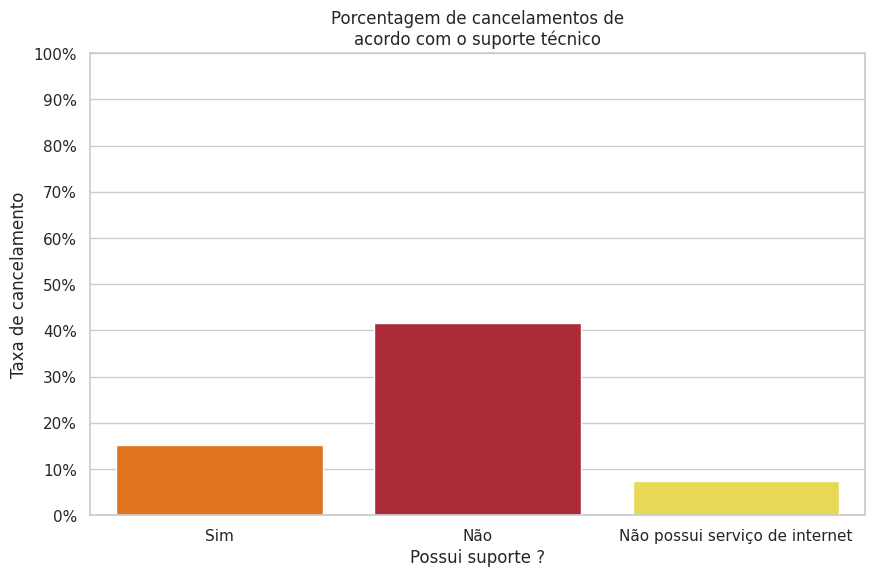

In [65]:
# Análise em relação a taxa de cancelamento
plot_tx_cancelamento_comparacao(data=dataset,
                                 x_col="TechSupport",
                                 y_col="ChurnPercentage",
                                 title="Porcentagem de cancelamentos de acordo com o suporte técnico",
                                 xlabel="Possui suporte ?",
                                 ylabel="Taxa de cancelamento",
                                 colors=["#ff7000", "#c11528", "#ffeb3e"],
                                 xticklabels=['Sim', 'Não', 'Não possui serviço de internet'] )

### **Informações extraídas até o momento**

- A nossa base de dados possui cerca de 7043 clientes.
- A nossa váriavel alvo é o campo *Churn*
- Dentro da nossa base existem apenas 11 valores ausentes, cerca de 0.007% da nossa base. Como é uma amostra pequena podemos até mesma deletar esses dados, ou substituí-los atráves de alguma técnica.
- Grande parte dos dados estão em formato de *object* ou seja são dados categóricos. Será necessário convertê-los para dados númericos posteriormente.
- Mais de 25% dos clientes abandoram o serviço, ou seja para cada 4 clientes 1 abandona a empresa.

- A maioria dos clientes  não são  idosos (> 80%).
- A taxa de desistência de Idosos (> 40%). Os clientes mais jovens é (< 25%)
- Os mais velhos cancelam mais do que os clientes mais jovens.

- A distribuição entre os genêros é quase igual.
- A taxa de desistência  entre os genêros é quase a mesma também.
- Isso indica que taxa de desistência não tem relação com o gênero.

- Cerca de 70% dos clientes não possuem dependentes.
- Observa-se que clientes que não possuem dependentes possuem taxa de cancelamento (>30%).
- Podemos dizer que clientes que possuem dependentes costumam permanecer por mais tempo em relação aos demais.

- A distribuição dos clientes que possuem/não possuem um parceiro é quase igual.
- Em relação a taxa de cancelamentos, obeservamos que clientes que não possuem parceiro tem uma taxa de cancelamento maior (>30%).

- Percebe-se que a maioria dos clientes cancela em aproximadamente 1 ano.
- Percebe-se também que um aumento nos clientes após 5 anos. Logo a taxa de cancelamento tende a diminuir ao longo do tempo.
- Quanto maior o tempo de cliente, menor a taxa de cancelamento. Portanto, a retenção de clientes recém-chegados (< 1 ano) é importante.

- Mais de 50% dos contratos, são contratos mensais, consequentemente a maior taxa de cancelamentos é mensal também.
- Já os outro formatos de contratos tem cerca de 20 % cada.
- Os contratos de 2 anos possuem a maior taxa de retenção, porém eles ainda demonstram taxas de cancelamentos.

- Cerca 60% dos clientes possui faturamento sem papel.
- Consequentemente a taxa de cancelamentos também é maior (> 30%)

- A preferência pela forma de pagamento de Cheque Eletronico é superior as demais, cerca de (>30%). Consequentemente esses clientes apresentam maior taxa de cancelamento dos serviços (> 40%). Já as outras formas demonstram taxas de cancelamento menores, cerca de 20 % menores.

- Muitos clientes usam planos baratos até 30, cerca de 24%. A taxa de cancelamento deles também é menor
- Clientes com planos de 18 até 28 e 58 até 68 possuem taxas baixas de cancelamento próximas a 10 %
- O intervalo de 68 até 108 possui a maior taxa de cancelamentos, acima de 35%
- Clientes com planos de 28 até 48 também possuem taxas de cancelamentos próximas a 30 %.


- Cerca de 50 % tem um gasto total inferior a 2000 com planos. Eles também apresentam as maiores taxas de cancelamentos, próximos a 30 %.
- Clientes com gastos maiores que  8000 cerca de 4,8% dos clientes também possuem uma alta taxa de cancelamentos próxima de 50%, necessitando de atenção e análise com esses clientes.


- Mais de 90% possuem serviço telefônico, a taxa de cancelamento é praticamente igual para esses dados, cerca de 30%.

- Cerca de 42% possui mais de uma linha telefonica e cerca de 48% possuem uma linha única.
- A taxa de cancelamentos é maior entre clientes com múltiplas linhas, (< 30%).

- Cerca de 40% possuem serviços de internet de Fibra, a taxa de cancelamento dessas pessoas é superior a 40%. Cerca de 34% usam serviço DSL, a taxa de cancelamento deles é inferior a 20%.

- Cerca de 50% dos clientes não possuem serviços de segurança online,a taxa de cancelamentos desses clientes  é mais alta (> 40%).

- 43% dos clientes não possuem serviço de backup online, a taxa de cancelamentos desses clientes  é próxima de 40%.

- 44% dos clientes não possuem serviço de proteção de dispositivo, a taxa de cancelamentos desses clientes  é próxima de 40%. Para os que possuem 20% cancelam.

- 50% dos clientes não possuem suporte técnico, desses temos uma taxa de cancelamento de 40%. Para os demais a taxa de cancelamento é menor, próxima de 10%.





### Análise individual se o cliente possui streaming de TV (*StremingTV*) e a relação dessa informação com a taxa de cancelamento

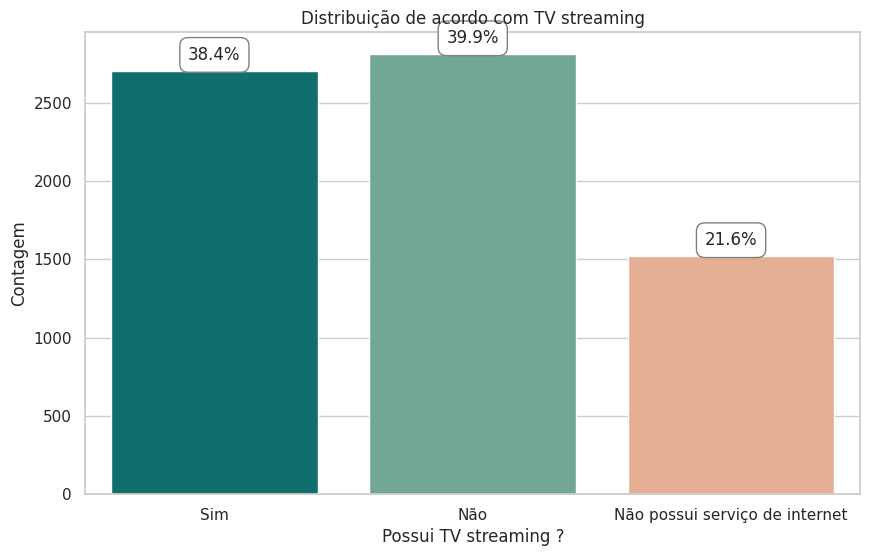

In [66]:
# Análise Individual
plot_distribuicao(nome_coluna='StreamingTV',
                  data=dataset,
                  palette=custom_palette,
                  title='Distribuição de acordo com TV streaming',
                  x_label='Possui TV streaming ?',
                  y_label='Contagem',
                  rotation=0,
                  x_tick_labels=['Sim', 'Não', 'Não possui serviço de internet']
                  )

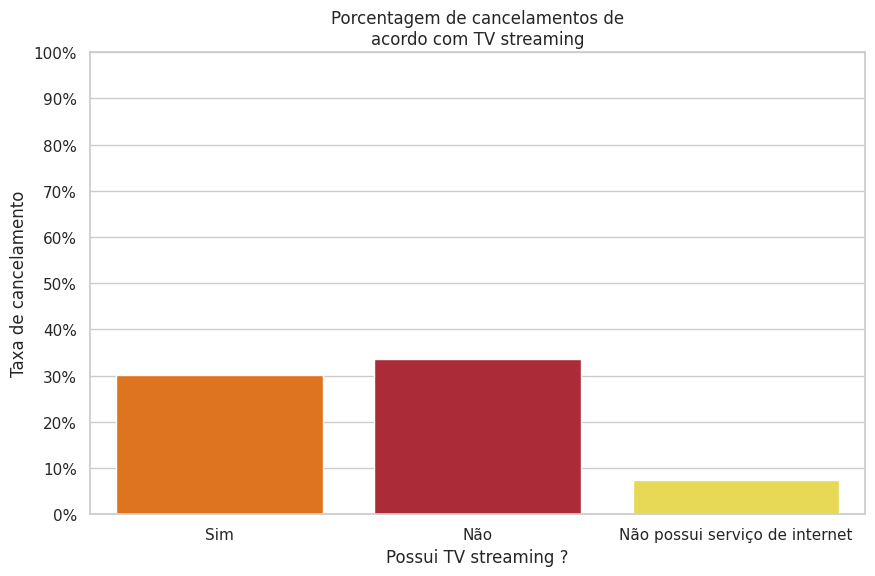

In [67]:
# Análise em relação a taxa de cancelamento
plot_tx_cancelamento_comparacao(data=dataset,
                                 x_col="StreamingTV",
                                 y_col="ChurnPercentage",
                                 title="Porcentagem de cancelamentos de acordo com TV streaming",
                                 xlabel="Possui TV streaming ?",
                                 ylabel="Taxa de cancelamento",
                                 colors=["#ff7000", "#c11528", "#ffeb3e"],
                                 xticklabels=['Sim', 'Não', 'Não possui serviço de internet'] )

### **Informações extraídas até o momento**

- A nossa base de dados possui cerca de 7043 clientes.
- A nossa váriavel alvo é o campo *Churn*
- Dentro da nossa base existem apenas 11 valores ausentes, cerca de 0.007% da nossa base. Como é uma amostra pequena podemos até mesma deletar esses dados, ou substituí-los atráves de alguma técnica.
- Grande parte dos dados estão em formato de *object* ou seja são dados categóricos. Será necessário convertê-los para dados númericos posteriormente.
- Mais de 25% dos clientes abandoram o serviço, ou seja para cada 4 clientes 1 abandona a empresa.

- A maioria dos clientes  não são  idosos (> 80%).
- A taxa de desistência de Idosos (> 40%). Os clientes mais jovens é (< 25%)
- Os mais velhos cancelam mais do que os clientes mais jovens.

- A distribuição entre os genêros é quase igual.
- A taxa de desistência  entre os genêros é quase a mesma também.
- Isso indica que taxa de desistência não tem relação com o gênero.

- Cerca de 70% dos clientes não possuem dependentes.
- Observa-se que clientes que não possuem dependentes possuem taxa de cancelamento (>30%).
- Podemos dizer que clientes que possuem dependentes costumam permanecer por mais tempo em relação aos demais.

- A distribuição dos clientes que possuem/não possuem um parceiro é quase igual.
- Em relação a taxa de cancelamentos, obeservamos que clientes que não possuem parceiro tem uma taxa de cancelamento maior (>30%).

- Percebe-se que a maioria dos clientes cancela em aproximadamente 1 ano.
- Percebe-se também que um aumento nos clientes após 5 anos. Logo a taxa de cancelamento tende a diminuir ao longo do tempo.
- Quanto maior o tempo de cliente, menor a taxa de cancelamento. Portanto, a retenção de clientes recém-chegados (< 1 ano) é importante.

- Mais de 50% dos contratos, são contratos mensais, consequentemente a maior taxa de cancelamentos é mensal também.
- Já os outro formatos de contratos tem cerca de 20 % cada.
- Os contratos de 2 anos possuem a maior taxa de retenção, porém eles ainda demonstram taxas de cancelamentos.

- Cerca 60% dos clientes possui faturamento sem papel.
- Consequentemente a taxa de cancelamentos também é maior (> 30%)

- A preferência pela forma de pagamento de Cheque Eletronico é superior as demais, cerca de (>30%). Consequentemente esses clientes apresentam maior taxa de cancelamento dos serviços (> 40%). Já as outras formas demonstram taxas de cancelamento menores, cerca de 20 % menores.

- Muitos clientes usam planos baratos até 30, cerca de 24%. A taxa de cancelamento deles também é menor
- Clientes com planos de 18 até 28 e 58 até 68 possuem taxas baixas de cancelamento próximas a 10 %
- O intervalo de 68 até 108 possui a maior taxa de cancelamentos, acima de 35%
- Clientes com planos de 28 até 48 também possuem taxas de cancelamentos próximas a 30 %.


- Cerca de 50 % tem um gasto total inferior a 2000 com planos. Eles também apresentam as maiores taxas de cancelamentos, próximos a 30 %.
- Clientes com gastos maiores que  8000 cerca de 4,8% dos clientes também possuem uma alta taxa de cancelamentos próxima de 50%, necessitando de atenção e análise com esses clientes.


- Mais de 90% possuem serviço telefônico, a taxa de cancelamento é praticamente igual para esses dados, cerca de 30%.

- Cerca de 42% possui mais de uma linha telefonica e cerca de 48% possuem uma linha única.
- A taxa de cancelamentos é maior entre clientes com múltiplas linhas, (< 30%).

- Cerca de 40% possuem serviços de internet de Fibra, a taxa de cancelamento dessas pessoas é superior a 40%. Cerca de 34% usam serviço DSL, a taxa de cancelamento deles é inferior a 20%.

- Cerca de 50% dos clientes não possuem serviços de segurança online,a taxa de cancelamentos desses clientes  é mais alta (> 40%).

- 43% dos clientes não possuem serviço de backup online, a taxa de cancelamentos desses clientes  é próxima de 40%.

- 44% dos clientes não possuem serviço de proteção de dispositivo, a taxa de cancelamentos desses clientes  é próxima de 40%. Para os que possuem 20% cancelam.

- 50% dos clientes não possuem suporte técnico, desses temos uma taxa de cancelamento de 40%. Para os demais a taxa de cancelamento é menor, próxima de 10%.

- Os clientes que possuem serviços de streaming de TV são cerca de 38 % e possuem uma taxa de cancelamento próxima de 30%. Entre os que não possui, cerca de 40%, também tem uma taxa de cancelamento próxima de 30%.



### Análise individual se o cliente possui streaming de filmes (*StreamingMovies*) e a relação dessa informação com a taxa de cancelamento

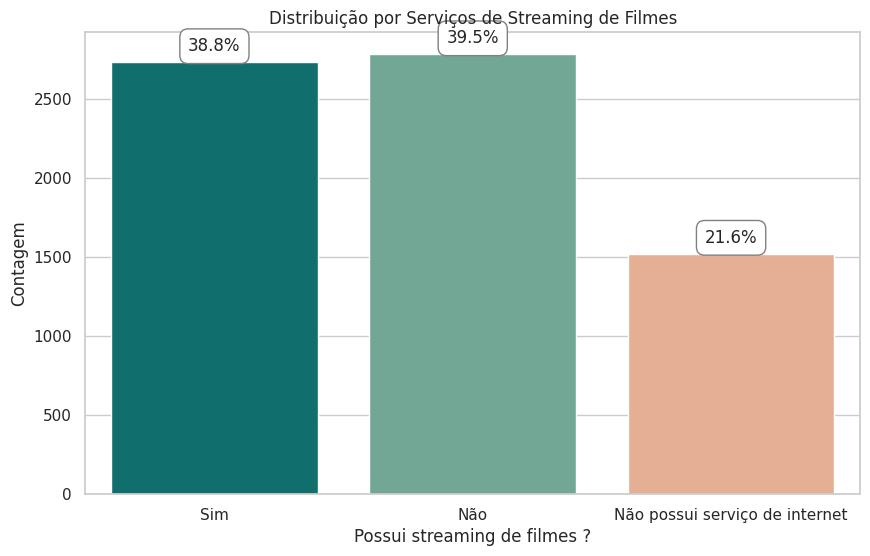

In [68]:
# Análise Individual
plot_distribuicao(nome_coluna='StreamingMovies',
                  data=dataset,
                  palette=custom_palette,
                  title='Distribuição por Serviços de Streaming de Filmes',
                  x_label='Possui streaming de filmes ?',
                  y_label='Contagem',
                  rotation=0,
                  x_tick_labels=['Sim', 'Não', 'Não possui serviço de internet']
                  )

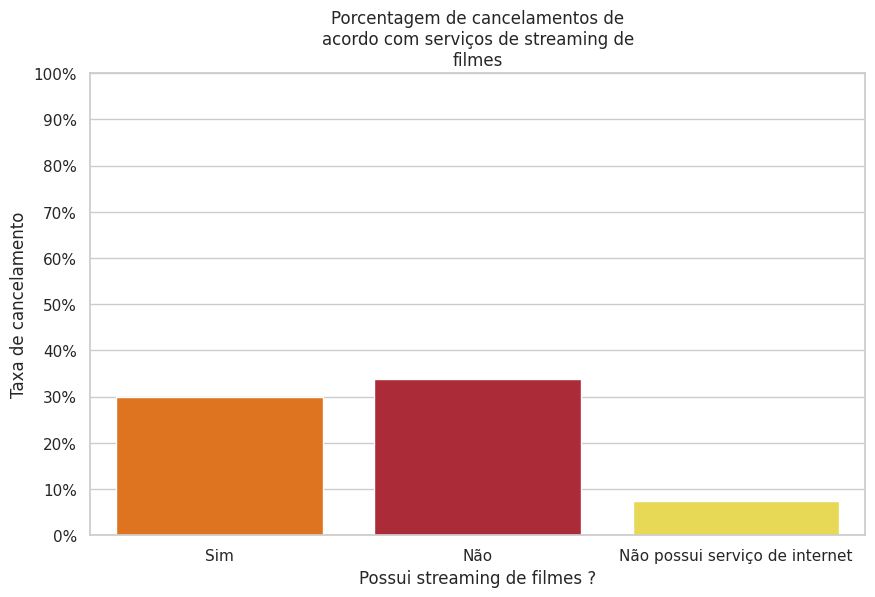

In [69]:
# Análise em relação a taxa de cancelamento
plot_tx_cancelamento_comparacao(data=dataset,
                                 x_col="StreamingMovies",
                                 y_col="ChurnPercentage",
                                 title="Porcentagem de cancelamentos de acordo com serviços de streaming de filmes",
                                 xlabel="Possui streaming de filmes ?",
                                 ylabel="Taxa de cancelamento",
                                 colors=["#ff7000", "#c11528", "#ffeb3e"],
                                 xticklabels=['Sim', 'Não', 'Não possui serviço de internet'] )

### **Informações extraídas até o momento**

- A nossa base de dados possui cerca de 7043 clientes.
- A nossa váriavel alvo é o campo *Churn*
- Dentro da nossa base existem apenas 11 valores ausentes, cerca de 0.007% da nossa base. Como é uma amostra pequena podemos até mesma deletar esses dados, ou substituí-los atráves de alguma técnica.
- Grande parte dos dados estão em formato de *object* ou seja são dados categóricos. Será necessário convertê-los para dados númericos posteriormente.
- Mais de 25% dos clientes abandoram o serviço, ou seja para cada 4 clientes 1 abandona a empresa.

- A maioria dos clientes  não são  idosos (> 80%).
- A taxa de desistência de Idosos (> 40%). Os clientes mais jovens é (< 25%)
- Os mais velhos cancelam mais do que os clientes mais jovens.

- A distribuição entre os genêros é quase igual.
- A taxa de desistência  entre os genêros é quase a mesma também.
- Isso indica que taxa de desistência não tem relação com o gênero.

- Cerca de 70% dos clientes não possuem dependentes.
- Observa-se que clientes que não possuem dependentes possuem taxa de cancelamento (>30%).
- Podemos dizer que clientes que possuem dependentes costumam permanecer por mais tempo em relação aos demais.

- A distribuição dos clientes que possuem/não possuem um parceiro é quase igual.
- Em relação a taxa de cancelamentos, obeservamos que clientes que não possuem parceiro tem uma taxa de cancelamento maior (>30%).

- Percebe-se que a maioria dos clientes cancela em aproximadamente 1 ano.
- Percebe-se também que um aumento nos clientes após 5 anos. Logo a taxa de cancelamento tende a diminuir ao longo do tempo.
- Quanto maior o tempo de cliente, menor a taxa de cancelamento. Portanto, a retenção de clientes recém-chegados (< 1 ano) é importante.

- Mais de 50% dos contratos, são contratos mensais, consequentemente a maior taxa de cancelamentos é mensal também.
- Já os outro formatos de contratos tem cerca de 20 % cada.
- Os contratos de 2 anos possuem a maior taxa de retenção, porém eles ainda demonstram taxas de cancelamentos.

- Cerca 60% dos clientes possui faturamento sem papel.
- Consequentemente a taxa de cancelamentos também é maior (> 30%)

- A preferência pela forma de pagamento de Cheque Eletronico é superior as demais, cerca de (>30%). Consequentemente esses clientes apresentam maior taxa de cancelamento dos serviços (> 40%). Já as outras formas demonstram taxas de cancelamento menores, cerca de 20 % menores.

- Muitos clientes usam planos baratos até 30, cerca de 24%. A taxa de cancelamento deles também é menor
- Clientes com planos de 18 até 28 e 58 até 68 possuem taxas baixas de cancelamento próximas a 10 %
- O intervalo de 68 até 108 possui a maior taxa de cancelamentos, acima de 35%
- Clientes com planos de 28 até 48 também possuem taxas de cancelamentos próximas a 30 %.


- Cerca de 50 % tem um gasto total inferior a 2000 com planos. Eles também apresentam as maiores taxas de cancelamentos, próximos a 30 %.
- Clientes com gastos maiores que  8000 cerca de 4,8% dos clientes também possuem uma alta taxa de cancelamentos próxima de 50%, necessitando de atenção e análise com esses clientes.


- Mais de 90% possuem serviço telefônico, a taxa de cancelamento é praticamente igual para esses dados, cerca de 30%.

- Cerca de 42% possui mais de uma linha telefonica e cerca de 48% possuem uma linha única.
- A taxa de cancelamentos é maior entre clientes com múltiplas linhas, (< 30%).

- Cerca de 40% possuem serviços de internet de Fibra, a taxa de cancelamento dessas pessoas é superior a 40%. Cerca de 34% usam serviço DSL, a taxa de cancelamento deles é inferior a 20%.

- Cerca de 50% dos clientes não possuem serviços de segurança online,a taxa de cancelamentos desses clientes  é mais alta (> 40%).

- 43% dos clientes não possuem serviço de backup online, a taxa de cancelamentos desses clientes  é próxima de 40%.

- 44% dos clientes não possuem serviço de proteção de dispositivo, a taxa de cancelamentos desses clientes  é próxima de 40%. Para os que possuem 20% cancelam.

- 50% dos clientes não possuem suporte técnico, desses temos uma taxa de cancelamento de 40%. Para os demais a taxa de cancelamento é menor, próxima de 10%.

- Os clientes que possuem serviços de streaming de TV são cerca de 38 % e possuem uma taxa de cancelamento próxima de 30%. Entre os que não possui, cerca de 40%, também tem uma taxa de cancelamento próxima de 30%.

-  Dentre os clientes que possuem serviços de streaming de Filmes cerca de 38 % e possuem uma taxa de cancelamento próxima de 30%. Entre os que não possui, cerca de 40%, também tem uma taxa de cancelamento próxima de 32%.

## Correlações

Taxa de cancelamento geral: 26.58%
Taxa de cancelamento por gênero:
 gender  Churn
Female  No       0.730405
        Yes      0.269595
Male    No       0.737954
        Yes      0.262046
Name: proportion, dtype: float64
Taxa de cancelamento por idade:
 SeniorCitizen  Churn
0              No       0.763497
               Yes      0.236503
1              No       0.583187
               Yes      0.416813
Name: proportion, dtype: float64
Taxa de cancelamento por contrato:
 Contract        Churn
Month-to-month  No       0.572903
                Yes      0.427097
One year        No       0.887228
                Yes      0.112772
Two year        No       0.971513
                Yes      0.028487
Name: proportion, dtype: float64
Taxa de cancelamento por forma de pagamento:
 PaymentMethod              Churn
Bank transfer (automatic)  No       0.832685
                           Yes      0.167315
Credit card (automatic)    No       0.847469
                           Yes      0.152531
Electro

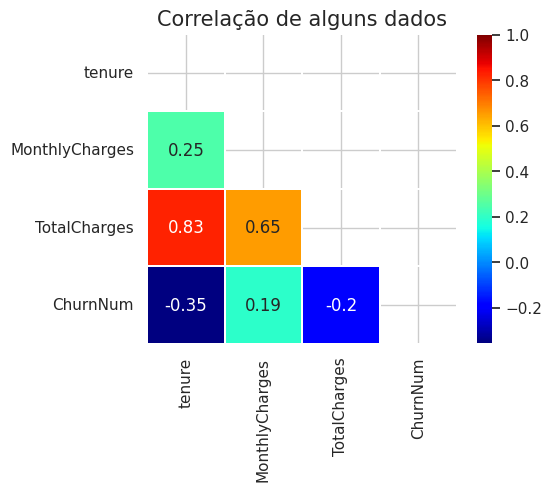

In [70]:
# Verificando a taxa de cancelamento geral
churn_rate = dataset['Churn'].value_counts(normalize=True)['Yes']
print("Taxa de cancelamento geral: {:.2f}%".format(churn_rate * 100))

# Calculando a taxa de cancelamento por gênero
churn_rate_gender = dataset.groupby('gender')['Churn'].value_counts(normalize=True)
print("Taxa de cancelamento por gênero:\n", churn_rate_gender)

# Calculando a taxa de cancelamento por idade
churn_rate_age = dataset.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True)
print("Taxa de cancelamento por idade:\n", churn_rate_age)

# Calculando a taxa de cancelamento por contrato
churn_rate_contract = dataset.groupby('Contract')['Churn'].value_counts(normalize=True)
print("Taxa de cancelamento por contrato:\n", churn_rate_contract)

# Calculando a taxa de cancelamento por forma de pagamento
churn_rate_payment = dataset.groupby('PaymentMethod')['Churn'].value_counts(normalize=True)
print("Taxa de cancelamento por forma de pagamento:\n", churn_rate_payment)

# Calculando a média de tenure (tempo de contrato) dos clientes que cancelaram
mean_tenure_churned = dataset[dataset['Churn'] == 'Yes']['tenure'].mean()
print("Média de tenure dos clientes que cancelaram: {:.2f}".format(mean_tenure_churned))


features = ['tenure', 'MonthlyCharges', 'TotalCharges','ChurnNum']
corr_matrix = dataset[features].corr()
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

fig, axes = plt.subplots(figsize=(5,5))
sns.heatmap(corr_matrix, linewidths=0.25, vmax=1.0, square=True, cmap=plt.get_cmap('jet'),
            linecolor='w', annot=True, mask=mask, cbar_kws={"shrink": 0.8}, ax=axes)
axes.set_title('Correlação de alguns dados', fontsize=15)
plt.show()





## Análises e Hipóteses


### Análises
- 1 em cada 4 clientes cancelam os serviços
- 20 % dos clientes são idosos, dentre eles 40% cancelam o plano
- 70 % dos clientes não possuem dependentes, dentre esses 30% cancelam
- Clientes que possuem dependentes tendem a permanecer por mais tempo
- Clientes que não possuem parceiros tem uma taxa de cancelamento maior, cerca de 30%
- A maioria dos clientes cancela os serviços em até 1 ano
- Quanto maior o tempo de fidelidade do cliente, menor a taxa de cancelamento
- Mais de 50% dos contratos, são contratos mensais, consequentemente a maior taxa de cancelamentos é mensal também
- 60% dos clientes tem faturamento sem ser papel e possui 30% de taxa de cancelamento
- Muitos clientes usam planos baratos até 30 reais, cerca de 24%. A taxa de cancelamento deles também é menor
- Clientes com planos de 18 até 28 e 58 até 68 possuem taxas baixas de cancelamento próximas a 10 %
- O intervalo de 68 até 108 possui a maior taxa de cancelamentos, acima de 35%
- Clientes com gastos maiores que 8000 cerca de 4,8% dos clientes também possuem uma alta taxa de cancelamentos próxima de 50%, necessitando de atenção e análise com esses clientes
- Cerca de 40% possuem serviços de internet de Fibra, a taxa de cancelamento dessas pessoas é superior a 40%. Cerca de 34% usam serviço DSL, a taxa de cancelamento deles é inferior a 20%
- 50% dos clientes não possuem suporte técnico, desses temos uma taxa de cancelamento de 40%. Para os demais a taxa de cancelamento é menor, próxima de 10%.
- Com base nas observações feitas até agora, as principais conclusões ou destaques são:
- O serviço telefônico parece ser o mais popular
- Os clientes que recebem fatura digital podem ter algum problema no entendimento da fatura, devido taxa de cancelamentos acima de 30%
- 30% dos clients de telefone não possuem plano de internet
- Clientes que possuem tanto internet quanto serviços de telefone permanecem mais tempo do que aqueles com apenas internet




### Perguntas e Hipóteses e Conclusões
Algumas perguntas que devem ser respondidas:
- Quais são os principais fatores ligados ao cancelamento pelos clientes?
- Qual perfil de clientes que efetuam o cancelamento ?
- A empresa está perdendo clientes de alto valor ?



1. **Hipótese 1: Clientes com contratos de curto prazo têm maior taxa de cancelamentos**
   - A alta taxa de cancelamento entre clientes com contratos mensais sugere que clientes com contratos mais longos podem ter uma maior taxa de retenção com a empresa, o que diminui a probabilidade de cancelamento. Isso pode ocorrer devido aos preços mais atrativos das propostas de longo prazo.

2. **Hipótese 2: Serviços adicionais de segurança online, backup e proteção de dispositivo influenciam a retenção de clientes.**
   - A alta taxa de cancelamento entre clientes que não possuem esses serviços adicionais sugere que eles podem ser percebidos como importantes pelos clientes e influenciam sua decisão de permanência com a empresa. Logo sugerir para novos clientes pacotes personalizados com esses serviços é uma excelente forma de aumentar a retenção.

3. **Hipótese 3: Clientes idosos têm uma taxa de cancelamento mais elevada, possivelmente devido a uma menor adaptação às novas tecnologias.**
   - A alta taxa de cancelamento entre clientes mais velhos pode ser atribuída a uma menor familiaridade com os serviços tecnológicos oferecidos pela empresa.

4. **Hipótese 4: A qualidade da conexão, de acordo com a diferença entre serviços como fibra e DSL, pode influenciar o cancelamento.**
   - A diferença nas taxas de cancelamento entre clientes com conexões de fibra e DSL indicam que a qualidade da conexão desempenha um papel importante na satisfação do cliente. Clientes insatisfeitos tendem a cancelar o serviço. Investir na melhoria de infraestuturas é uma excelente forma de prevenir o cancelamento dos serviços por parte dos clientes.

5. **Hipótese 5: A falta de suporte técnico gera insatisfação do cliente e, consequentemente, cancelamento.**
   - Problemas não resolvidos ou falta de assistência podem levar os clientes a procurar serviços mais confiáveis em outros lugares. Logo oferecer um suporte gratuito ou com desconto nas vendas para novos clientes é uma ótima forma de previnir o churn desse cliente.

6. **Hipótese 6: Os usuários tem maior probabilidade de abandono se a cobrança mensal for mais alta**
   - Usuários que apresentam maiores cobranças mensais maiores possuem maiores taxas de cancelamentos. Oferecer descontos para esses clientes é uma forma de prevenção.

7. **Hipótese 7: Os usuários de serviços de internet e telefonia em conjunto tem maior taxa de retenção**
   - Usuários que possuem um serviço de internet e telefonia possuem menores taxas de cancelamentos em comparação com os demais. Nesse caso a sugerir um pacote adicional na hora da assinatura, seja internet/telefonia é uma boa opção.




## Plano de Ação para reduzir taxa de cancelamentos:


- **Oferecer suporte técnico especializado para clientes com dificuldades tecnológicas (mais velhos)**.

- Oferecer descontos ou benefícios exclusivos para clientes que pagam as maiores taxas.
- Personalizar ofertas para clientes com base na duração do contrato e histórico de cancelamento.
- Promover os serviços adicionais (segurança online, backup e proteção de dispositivo) para os clientes mais novos (1 anos a 2 anos) para aumentar a retenção.
-  Promover a venda conjunta de serviços telefone/internet, além dos anteriores para os clientes mais novos (1 anos a 2 anos) pode aumentar a retenção.
- Investir em melhorias na infraestrutura de rede para garantir uma conexão estável e de alta qualidade.
- Oferecer upgrades de serviço para clientes com conexões de menor qualidade.
- Reforçar o suporte técnico com tempos de resposta mais rápidos e soluções eficazes.
- Implementar um sistema de feedback para avaliar a qualidade do suporte técnico e realizar melhorias contínuas.



### Estimativa de impacto das ações sugeridas



In [71]:
# Definindo as taxas de impacto de cada ação proposta
impacto_suporte_idosos = 0.20 * 0.5  # 20% dos clientes são idosos e metade deles poderia ser retida com suporte técnico adequado
impacto_contratos_longo_prazo = 0.10 * 0.25  # 10% dos clientes que normalmente cancelariam dentro de 1 ano poderiam ser retidos com contratos de longo prazo
impacto_servicos_adicionais = 0.20 * 0.30  # Aumento de 20% na adoção de serviços adicionais resulta em uma redução de 30% na taxa de cancelamento
impacto_infraestrutura_rede = (0.40 * 0.40) - (0.34 * 0.20)  # Diferença entre as taxas de cancelamento de fibra e DSL
impacto_melhoria_suporte = 0.50 * (0.40 - 0.10)  # Melhoria do suporte técnico para clientes sem suporte

# Calculando o impacto total estimado
impacto_total = (impacto_suporte_idosos + impacto_contratos_longo_prazo + impacto_servicos_adicionais +
                 impacto_infraestrutura_rede + impacto_melhoria_suporte) * 100

print("Impacto total estimado na redução da taxa de cancelamentos: {:.2f}%".format(impacto_total))


Impacto total estimado na redução da taxa de cancelamentos: 42.70%




1. **Oferecer suporte técnico especializado para clientes com dificuldades tecnológicas (mais velhos)**:
   - Supondo que a maioria dos clientes idosos (20% dos clientes) cancele o plano devido a dificuldades tecnológicas e que metade deles poderia ser retida com um suporte técnico adequado, podemos estimar uma redução  aproximadamente 10% (20% de 50%).

2. **Oferecer descontos ou benefícios exclusivos para retenção de clientes**:
   - Considerando que a maioria dos clientes cancela os serviços em até 1 ano, oferecer descontos para eles adquirierem contratos de longo prazo poderia reduzir o cancelamento. Se conseguirmos converter 10% dos clientes que normalmente cancelariam dentro de 1 ano para contratos de longo prazo, poderíamos estimar uma redução de cancelamento de 2,5% (10% de 25%).

3. **Promover os serviços adicionais para aumentar a retenção**:
   - Dado que clientes com serviços adicionais tendem a cancelar menos, se conseguirmos aumentar a adoção desses serviços em 20%, poderíamos estimar uma redução de cancelamento de 6% (20% de 30%).

4. **Investir em melhorias na infraestrutura de rede para garantir uma conexão estável e de alta qualidade**:
   - Se conseguirmos reduzir a taxa de cancelamento dos clientes com serviço de fibra (40% de 40%) para a taxa de cancelamento dos clientes com serviço DSL (34% de 20%), poderíamos estimar uma redução de cancelamento de 10,4% (40% de 40% menos 34% de 20%).

5. **Reforçar o suporte técnico com tempos de resposta mais rápidos e soluções eficazes**:
   - Se melhorarmos o suporte técnico para clientes sem suporte (50% dos clientes), reduzindo sua taxa de cancelamento de 40% para 10%, poderíamos estimar uma redução de cancelamento de 15%.



A implementação dessas ações poderia resultar em uma redução total da taxa de cancelamento de aproximadamente 42,7%.

É importante ressaltar que essas são estimativas e os resultados reais podem variar. Seria necessário a realização de testes  para comprovação correta.

## Próximas Etapas

Agora que os dados foram analisados e explorados, podemos em uma segunda etapa comprovar as hipóteses e construir um modelo de regressão para a prever a taxa de churn por parte dos clientes da empresa. Isso facilitará a identificação de potenciais riscos e direcionará as melhores ações.

